<a href="https://colab.research.google.com/github/vijaytiramale/Bike_Sharing_Demand_Prediction/blob/main/Vijay_Bike_sharing_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Bike Sharing Demand Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **GitHub Link -**



# **Project Summary -**

In metropolitan areas, bike-sharing programs aim to enhance the mobility and convenience of the public. Bike-sharing systems are automated and enable people to rent and return bikes at various locations. However, maintaining a consistent supply of bikes for rental is one of the main challenges of this project. The project's focus is on utilizing historical data on factors such as temperature and time to predict the demand for the bike-sharing program in Seoul

We imported the dataset and necessary libraries, which consisted of approximately 8760 records and 14 attributes. Exploratory data analysis (EDA) was conducted to gain insights into the data. We removed outliers and null values from the raw data and transformed it to ensure compatibility with machine learning models. Square root normalization was used to handle target class imbalance. The cleaned and scaled data was then sent to 11 different models, and hyperparameters were tuned to ensure the right parameters were being passed to the model. It is recommended to track multiple metrics when developing a machine learning model, so we focused on the R2 score and RMSE score. The R2 score is scale-independent, making it useful for comparing models that are fit to different target variables or have different units of measurement

# **Index**

1.   Problem Statement
2.   Know Your Data
3.   Understanding Your Variables
4.   EDA
5.   Data Cleaning
6.   Feature Engineering
7.   Model Building
8.   Model Implementaion.
9.   Conclusion

# **Let's Begin !**

## **1. Problem Statement**

Many metropolitan areas now offer bike rentals to improve mobility and convenience. Ensuring timely access to rental bikes is critical to reducing wait times for the public, making a consistent supply of rental bikes a major concern. The expected hourly bicycle count is particularly crucial in this regard. 

Bike sharing systems automate membership, rentals, and bike returns through a network of locations. Individuals can rent bikes from one location and return them to another or the same location, as needed. Membership or request facilitates bike rentals, and the process is overseen by a citywide network of automated stores. 

This dataset aims to predict the demand for Seoul's Bike Sharing Program based on historical usage patterns, including temperature, time, and other data.

### **Business Context** 

Estimating the demand for bikes at any given time and day is a crucial concern for bike rental businesses. Fewer bikes can result in resource wastage, while more bikes can lead to revenue loss, ranging from immediate loss due to a lower number of customers to potential long-term loss due to a loss of future customers. It is therefore important for bike rental businesses to have an estimate of demand to function effectively and efficiently

## **2. Know Your Data**

### Import Libraries

In [1]:
#data visualization libraries(matplotlib,seaborn, plotly)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("ticks")
sns.set_context("poster");
import plotly.express as px
from scipy.stats import norm

# Importing numpy, pandas and tensorflow
import pandas as pd
import numpy as np
import tensorflow as tf

# Z score
# from scipy import stats          # was using to detect outliers


# Datetime library for manipulating Date columns.
from datetime import datetime
import calendar

# from sci-kit library scaling, transforming and labeling functions are brought
# which is used to change raw feature vectors into a representation that is more 
# suitable for the downstream estimators. 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import  LabelEncoder

# Importing various machine learning models.
from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from lightgbm import LGBMRegressor
import lightgbm


# XGB regressor.
from xgboost import XGBRegressor

#calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# spilitting data
from sklearn.model_selection import train_test_split

#for optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error


# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 50
pd.options.display.float_format = "{:.3f}".format

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
# let's mount the google drive first
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# load the Seol bike data set from the drive


# Specify the encoding of the CSV file
encoding = 'iso-8859-1'

# Read the CSV file using pandas
b_data = pd.read_csv('/content/drive/MyDrive/Almabetter ML Projects/Bike Sharing Demand Prediction/SeoulBikeData.csv', encoding=encoding)

### Dataset First View

In [5]:
#displaying data from file using head function 
b_data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0           -5.200           37   
1  01/12/2017                204     1           -5.500           38   
2  01/12/2017                173     2           -6.000           39   
3  01/12/2017                107     3           -6.200           40   
4  01/12/2017                 78     4           -6.000           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0             2.200              2000                    -17.600   
1             0.800              2000                    -17.600   
2             1.000              2000                    -17.700   
3             0.900              2000                    -17.600   
4             2.300              2000                    -18.600   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                    0.000         0.000          0.000  Winter  No Holiday   
1                    0.000         0.000          0.000  Winter  No Holiday   
2                    0.000         0.000          0.000  Winter  No Holiday   
3                    0.000         0.000          0.000  Winter  No Holiday   
4                    0.000         0.000          0.000  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns Count

In [6]:
# Dataset Rows & Columns 
b_data.shape

(8760, 14)

In [7]:
print(f'number of rows : {b_data.shape[0]}  \nnumber of columns : {b_data.shape[1]}')

number of rows : 8760  
number of columns : 14


We have 14 columns. most of them are numerical except Seasons, Holiday, Functioning Days, and Date

We have to convert the Date column into the DateTime datatype.

### **Different features and their description**
   
> A feature is an input variable in simple linear regression. A simple machine learning project might use a single feature, while a more sophisticated machine learning 
project could use millions of features.

#### **Describing DataSet**

---
<b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


#### <b>Attribute Information: </b>

*  Date : year-month-day
*  Rented_Bike_Count - Count of bikes rented at each hour
*  Hour - Hour of he day
*  Temperature-Temperature in Celsius
*  Humidity - %
*  Windspeed - m/s
*  Visibility - 10m
*  Dew point temperature - Celsius
*  Solar radiation - MJ/m2
*  Rainfall - mm
*  Snowfall - cm
*  Seasons - Winter, Spring, Summer, Autumn
*  Holiday - Holiday/No holiday
*  Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### **Different features and their description**

In [9]:
#describing dataset to get Statistical info
b_data.describe().T             #.T is used to transpose the table, we can also use transpose() function

count     mean     std     min     25%      50%  \
Rented Bike Count         8760.000  704.602 644.997   0.000 191.000  504.500   
Hour                      8760.000   11.500   6.923   0.000   5.750   11.500   
Temperature(°C)           8760.000   12.883  11.945 -17.800   3.500   13.700   
Humidity(%)               8760.000   58.226  20.362   0.000  42.000   57.000   
Wind speed (m/s)          8760.000    1.725   1.036   0.000   0.900    1.500   
Visibility (10m)          8760.000 1436.826 608.299  27.000 940.000 1698.000   
Dew point temperature(°C) 8760.000    4.074  13.060 -30.600  -4.700    5.100   
Solar Radiation (MJ/m2)   8760.000    0.569   0.869   0.000   0.000    0.010   
Rainfall(mm)              8760.000    0.149   1.128   0.000   0.000    0.000   
Snowfall (cm)             8760.000    0.075   0.437   0.000   0.000    0.000   

                               75%      max  
Rented Bike Count         1065.250 3556.000  
Hour                        17.250   23.000  
Temperature(°C)             22.500   39.400  
Humidity(%)                 74.000   98.000  
Wind speed (m/s)             2.300    7.400  
Visibility (10m)          2000.000 2000.000  
Dew point temperature(°C)   14.800   27.200  
Solar Radiation (MJ/m2)      0.930    3.520  
Rainfall(mm)                 0.000   35.000  
Snowfall (cm)                0.000    8.800

* For mixed data types provided via a DataFrame, the default is to return only an analysis of numeric columns. If the DataFrame consists only of object and categorical data without any numeric columns, the default is to return an analysis of both the object and categorical columns. If include='all' is provided as an option, the result will include a union of attributes of each type 

* Columns like Wind speed, Dew_point_temperature, Solar Radiation, Rainfall, and Snowfall appear to be skewed in the dataset, as their median (50th percentile) is much lower than the highest value. Although the ranges of values in the numerical columns seem fair, it is worth noting that these particular columns exhibit a significant difference between the median and the highest value. This skewness suggests that there might be outliers or extreme values in these columns that could potentially affect data analysis or modeling. Therefore, it is advisable to consider addressing these skewed columns through appropriate data cleansing or preprocessing techniques before further analysis or modeling tasks.

In [10]:
#converting few names for convenience
b_data.rename({"Temperature(°C)": "Temperature",  
               "Functioning Day":"Functioning_Day",
                "Humidity(%)": "Humidity",  
                "Wind speed (m/s)": "Wind_speed",
                "Visibility (10m)": "Visibility",
                "Dew point temperature(°C)": "Dew_point_temperature",
                "Solar Radiation (MJ/m2)": "Solar_Radiation",
                "Snowfall (cm)": "Snowfall",
                "Rainfall(mm)": "Rainfall",
                "Rented Bike Count": "Rented_Bike_Count"},  
                axis = "columns", inplace = True) 

### Dataset Information

In [11]:
#@title Printing information about a DataFrame including the index dtype and columns, non-null values and memory usage
b_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

* The dataset consists of a total of 8,760 values with 14 different features. Fortunately, there are no null values present in the dataset.
* Among the features, there are 10 numerical columns: 'Rented_Bike_Count', 'Hour', 'Temperature(°C)', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', and 'Snowfall'. Additionally, there are 4 categorical features: 'Date', 'Seasons', 'Holiday', and 'Functioning_Day'.
* It is important to note that the 'Date' feature currently has an object data type, which may need to be further processed or treated to have the correct data type. Additionally, the 'Hour' column represents a timestamp and may require appropriate handling or formatting for further analysis according to the data description.

### Missing Values/Null Values

In [12]:
#checking null values for confirmation
b_data.isnull().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

In [13]:
#checking for duplicates
b_data.duplicated().value_counts()                #duplicated Return boolean Series denoting duplicate rows

False    8760
dtype: int64

* **Dataset has 8760 unique value and there is no repetition.**

**Changing Date data type**

In [15]:
#creating copy to keep oringal data safe
df = b_data.copy()

In [16]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

### Extracting date, month, year from date and adding to dataset

In [17]:
#Extracting month from date column
df['month'] = pd.DatetimeIndex(df['Date']).month
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

#Extracting day name from date
df['day'] = df['Date'].dt.day_name()

#Extracting year
df['year'] = df['Date'].dt.year

df.head(1)

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
0 2017-01-12                254     0       -5.200        37       2.200   

   Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
0        2000                -17.600            0.000     0.000     0.000   

  Seasons     Holiday Functioning_Day month       day  year  
0  Winter  No Holiday             Yes   Jan  Thursday  2017

In [18]:
# funciton to count total number of different value in specific column
def total(df,var):
  total = len(df[var].value_counts())
  return total

In [19]:
#calculating total count of different value in each column
total_lenght_different_column = {
    'Seasons': total(df,'Seasons'),
    'Holiday': total(df,'Holiday'),
    'Funtioning_Day': total(df,'Functioning_Day'),
    'month' : total(df,'month'),
    'day'   : total(df,'day'),
    'year'  : total(df,'year')
}


In [24]:
total_df = pd.DataFrame.from_dict(total_lenght_different_column,orient='index')

In [20]:
# dropping Date column
df.drop(columns=['Date'],inplace=True)
df.head(1)

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0       -5.200        37       2.200        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                -17.600            0.000     0.000     0.000  Winter   

      Holiday Functioning_Day month       day  year  
0  No Holiday             Yes   Jan  Thursday  2017

* Here, **hour** feature has numerical value but it explains timestamp.

In [21]:
# converting hour feature into categorial by changing is type 
df['Hour']=df['Hour'].astype('object')

* Categorial data are those values which can be used to classify information based on similarities.

* Numerical data is the information expressed numerically.

In [25]:
#total count of different value in
total_df.T

Seasons  Holiday  Funtioning_Day  month  day  year
0        4        2               2     12    7     2

The analysis indicates that the mentioned features have a limited number of distinct counts, ranging from 2 to 12. Considering this, it would be beneficial to categorize these features by converting them into an object data type or treating them as categorical features instead of using them as integers. This approach would facilitate encoding and further analysis of the data, as categorical variables can provide valuable insights and enable efficient handling of the feature values.

In [26]:
df['year'] = df['year'].astype('object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   object 
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   object 
 14  day                    8760 non-null   object 
 15  year

##  EDA

During the data exploration phase, the primary goal was to identify the relationship between different features in order to answer the project objective, which is to achieve stable bike demand every hour. To accomplish this, various analysis techniques were employed, including univariate analysis, bivariate analysis, and multivariate analysis.

By conducting these analyses, we can determine which feature(s) are likely to be most influential in achieving stable bike demand every hour. Through the exploration of the dataset, patterns, correlations, and dependencies among the features can be identified, providing insights into which specific factors play a significant role in maintaining a consistent demand for bikes throughout each hour.

In [28]:
#creating copy
dfr = df.copy()

In [29]:
#storing numerical feature in separate variable
num_feature = dfr.select_dtypes(exclude='object')    #Return a subset of the DataFrame’s columns based on the column dtypes
print(f'Numerical feature : {num_feature.columns.to_list()}')

Numerical feature : ['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall']


In [30]:
#storing categorial feature in separate variable
cat_feature = dfr.loc[:,  ~dfr.columns.isin(num_feature.columns.to_list())] #Pandas isin() method is used to filter data frames using boolean value true of false
print(f'Categorical feature : {cat_feature.columns.to_list()}')               #Tilde sign (~)works as a negation operator i.e reverse true to false and false to true

Categorical feature : ['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month', 'day', 'year']


#### **Univariate Analysis**

In [31]:
#analysing numerical value using density plot with mean and median
def density_plot(dfr,num_feature):
  graph = plt.figure(figsize = (20,30))
  for i,col in enumerate(num_feature) :
    sns.set_context('poster');
    plt.subplot(6,2,i+1);
    sns.distplot(dfr[col], color = '#055E85', fit = norm);
    feature = dfr[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #Rose-Red Color indicate mean of data
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #Cyan indicate median of data
    plt.title(f'{col.title()}');
    plt.tight_layout();

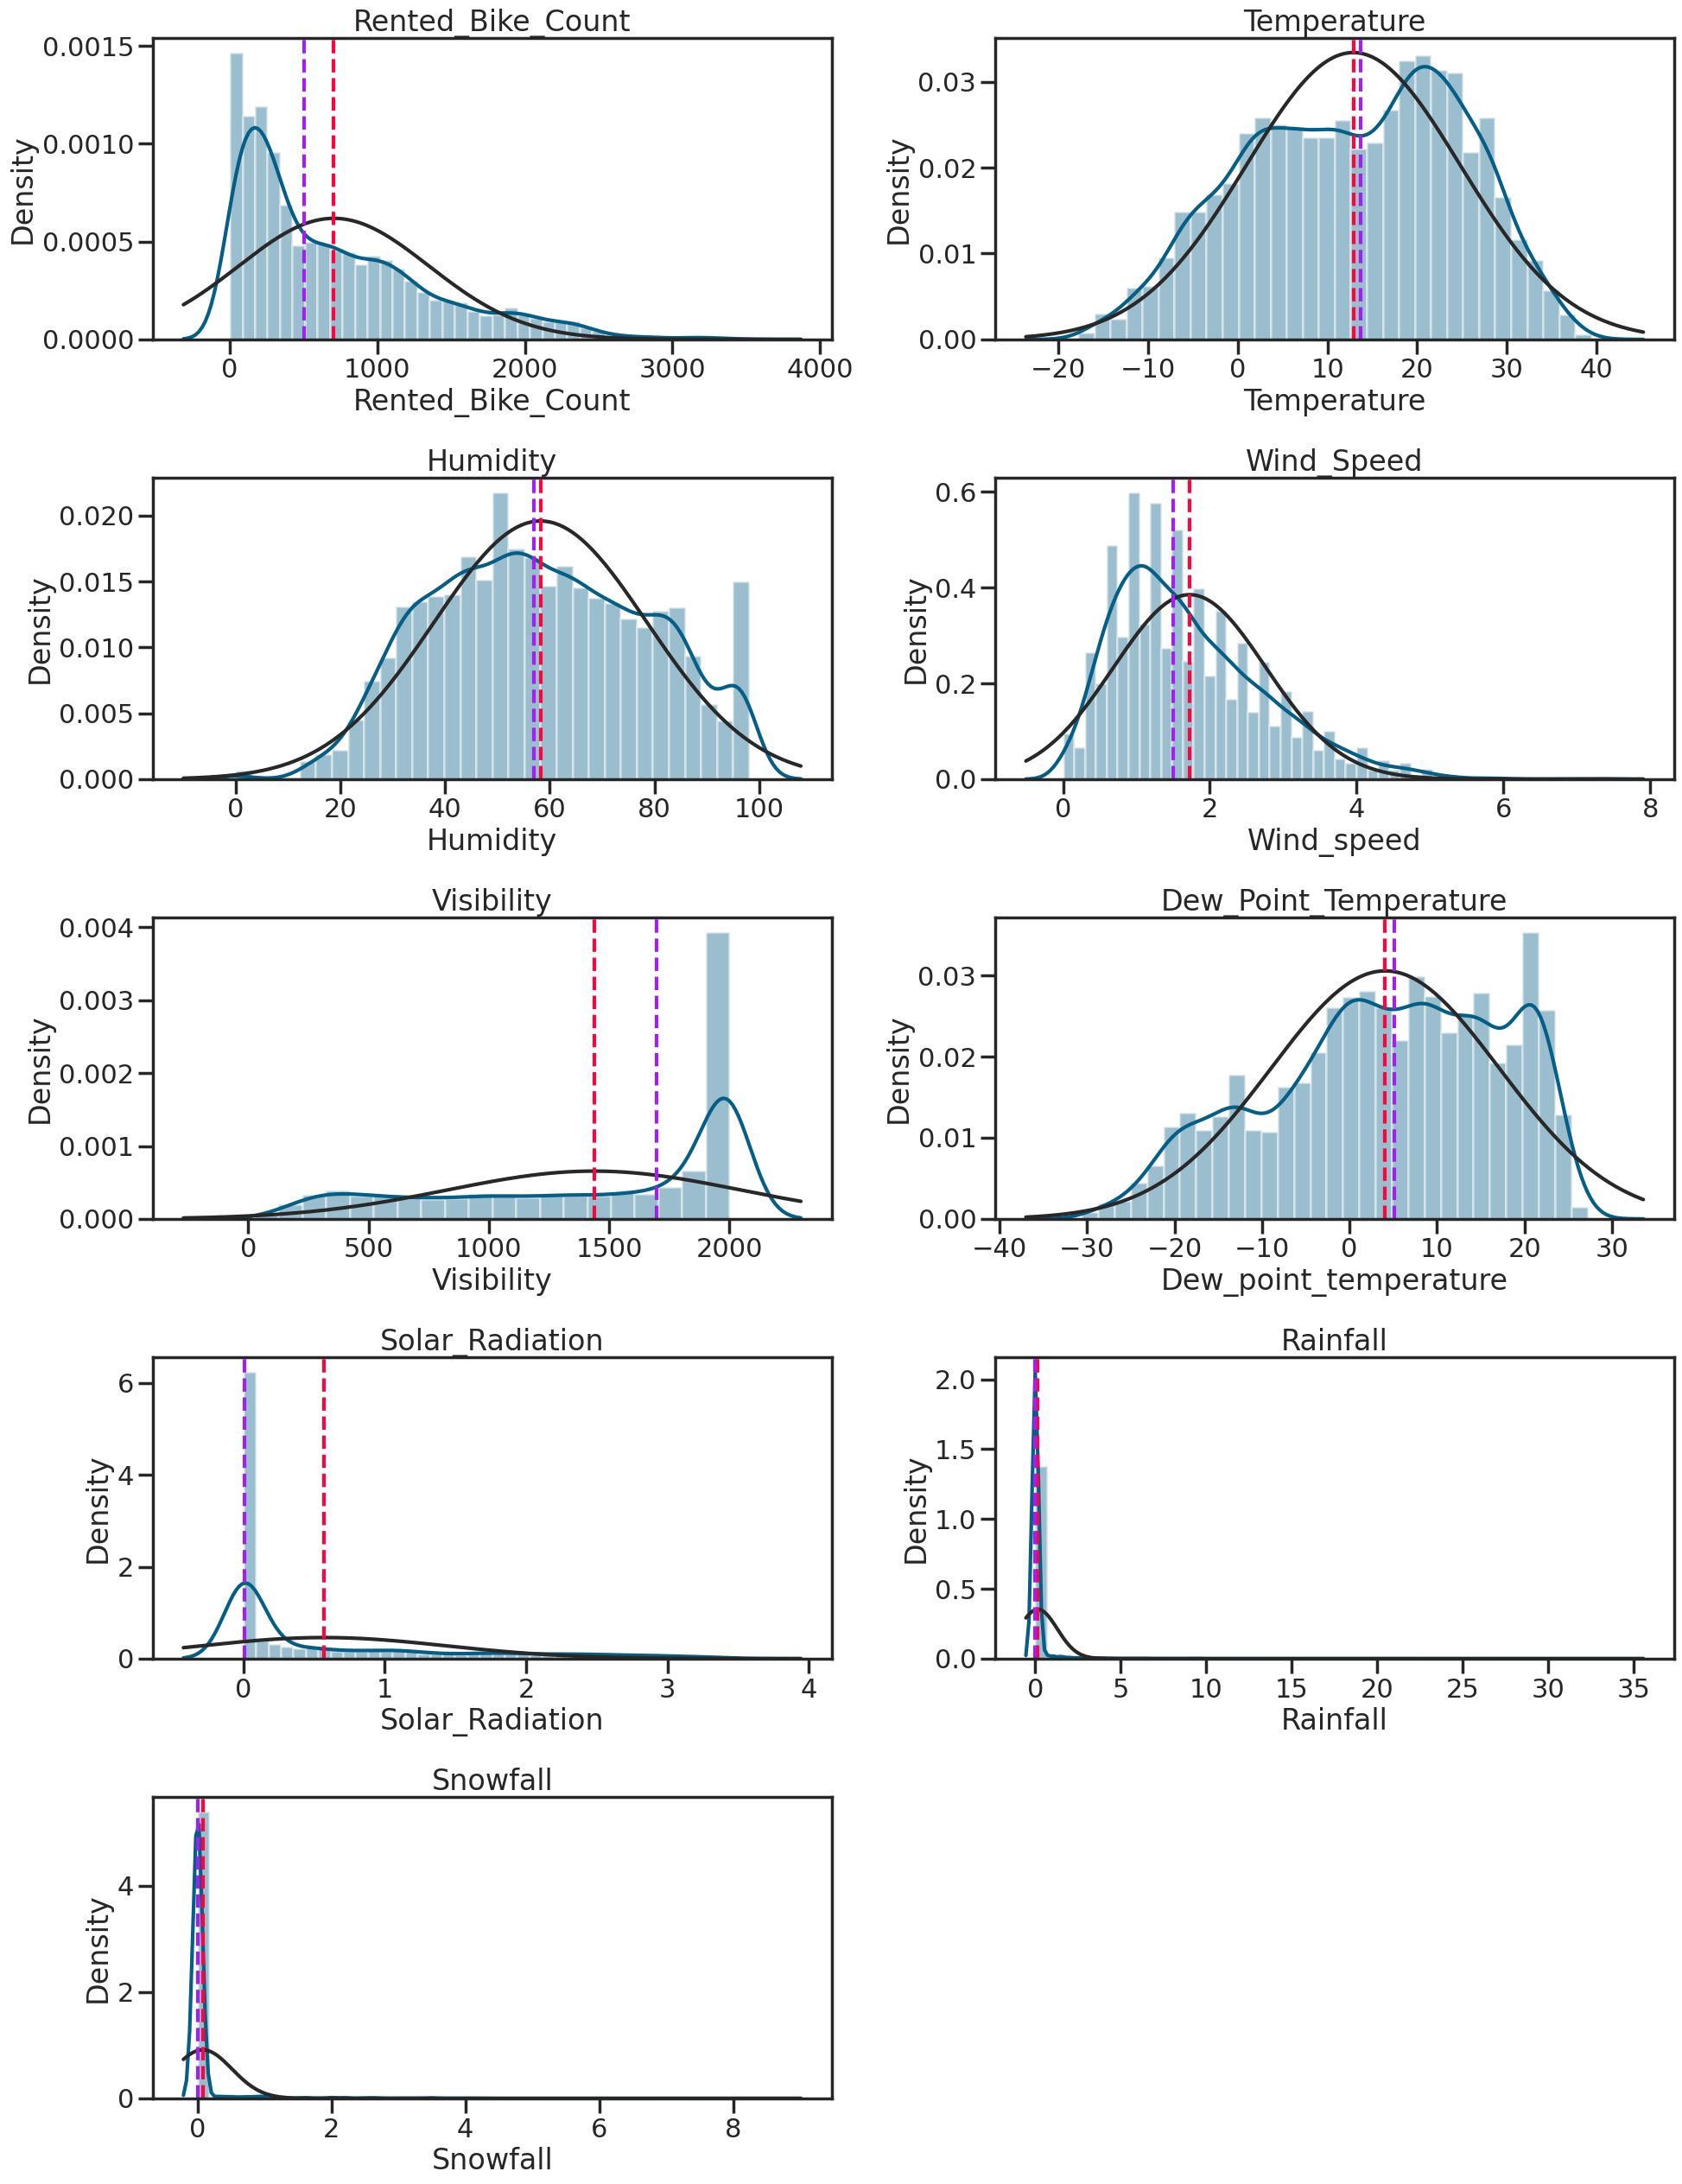

In [33]:
density_plot(dfr,num_feature)

---
* **skew** = measure of asymmetry of a distribution

* **kurtosis** = quantify shape of a distribution

In [32]:
dfr.agg(['skew', 'kurtosis']).T          #Aggregate using one or more operations over the specified axis

skew  kurtosis
Rented_Bike_Count      1.153     0.853
Hour                   0.000    -1.204
Temperature           -0.198    -0.838
Humidity               0.060    -0.804
Wind_speed             0.891     0.727
Visibility            -0.702    -0.962
Dew_point_temperature -0.367    -0.755
Solar_Radiation        1.504     1.126
Rainfall              14.533   284.991
Snowfall               8.441    93.803
year                  -2.978     6.872

From the above graph we can summarise that:

Right/Positive Skewed Distribution: Mode < Median < Mean: Rented_Bike_Count, Wind_speed, Solar Radiation

No Skew: Mean = Median = Mode : Hour, Temperature, Humidity,Rainfall,Snowfall

Left/Negative Skewed Distribution: Mean < Median < Mode: visibility



#### **Bivariate Analysis**

<Figure size 1500x600 with 0 Axes>

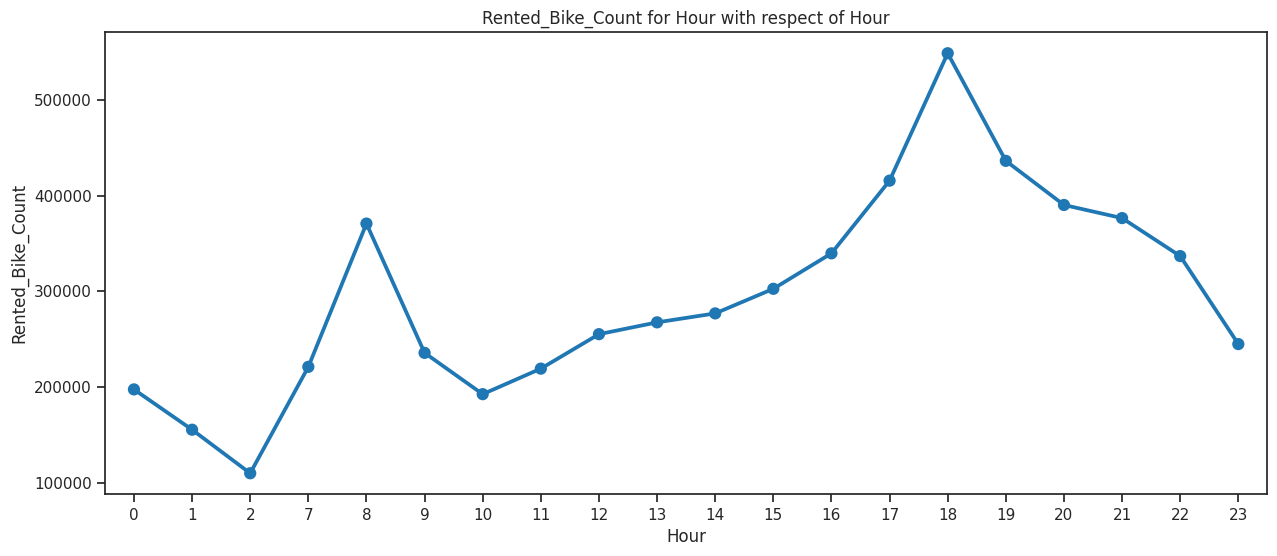

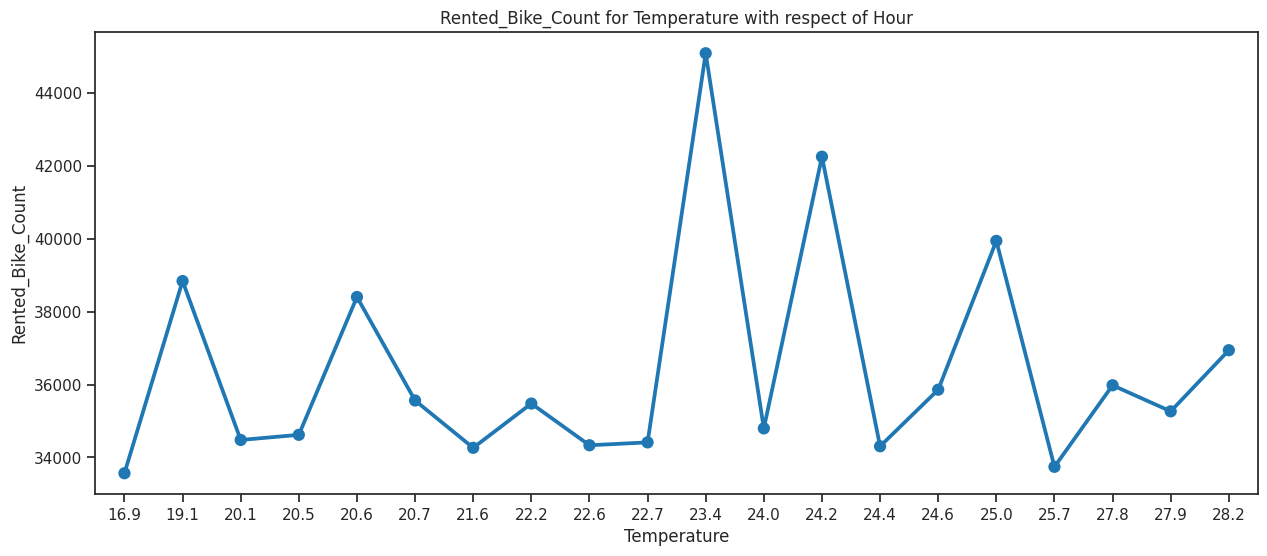

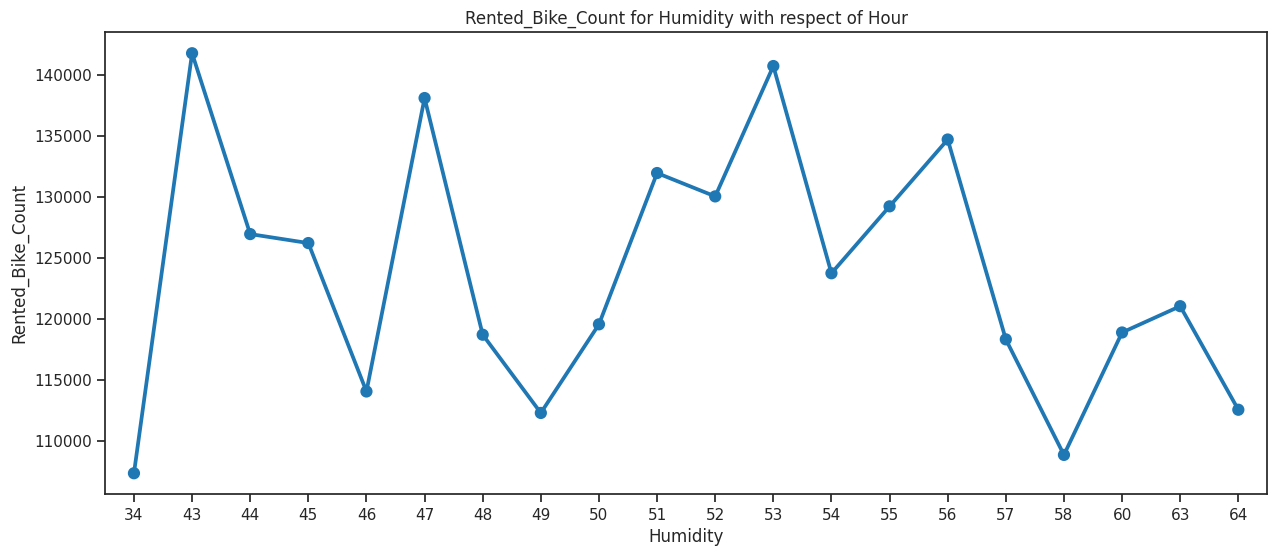

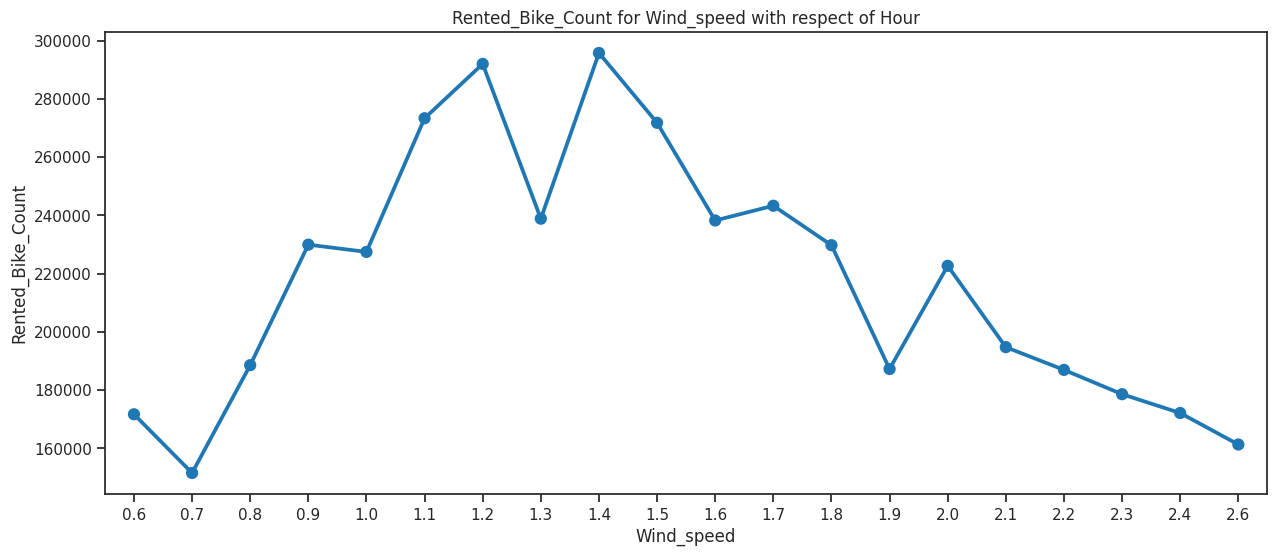

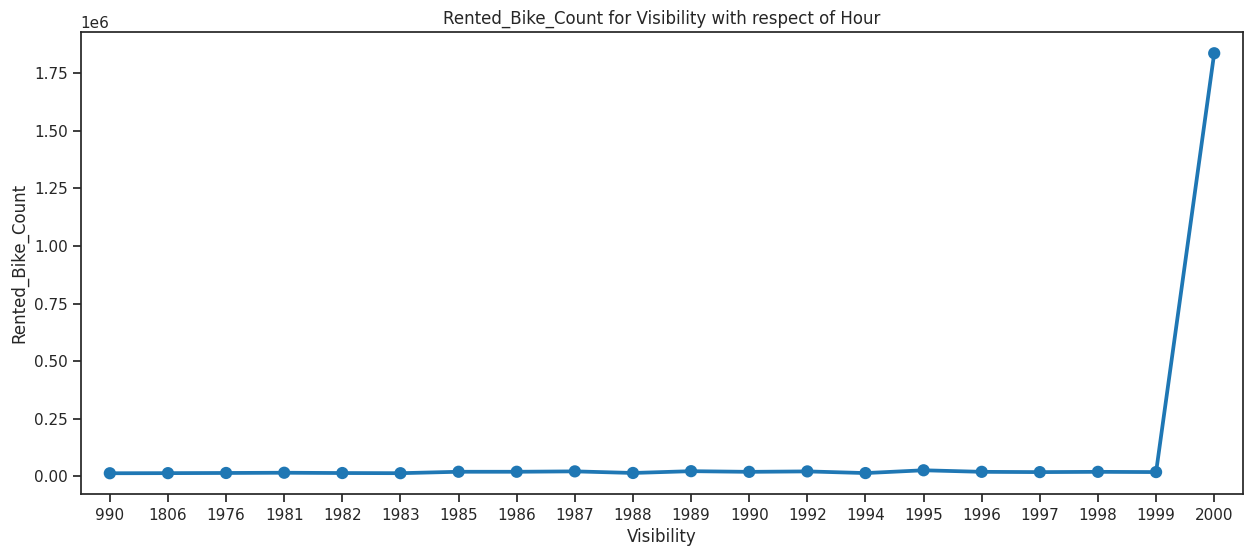

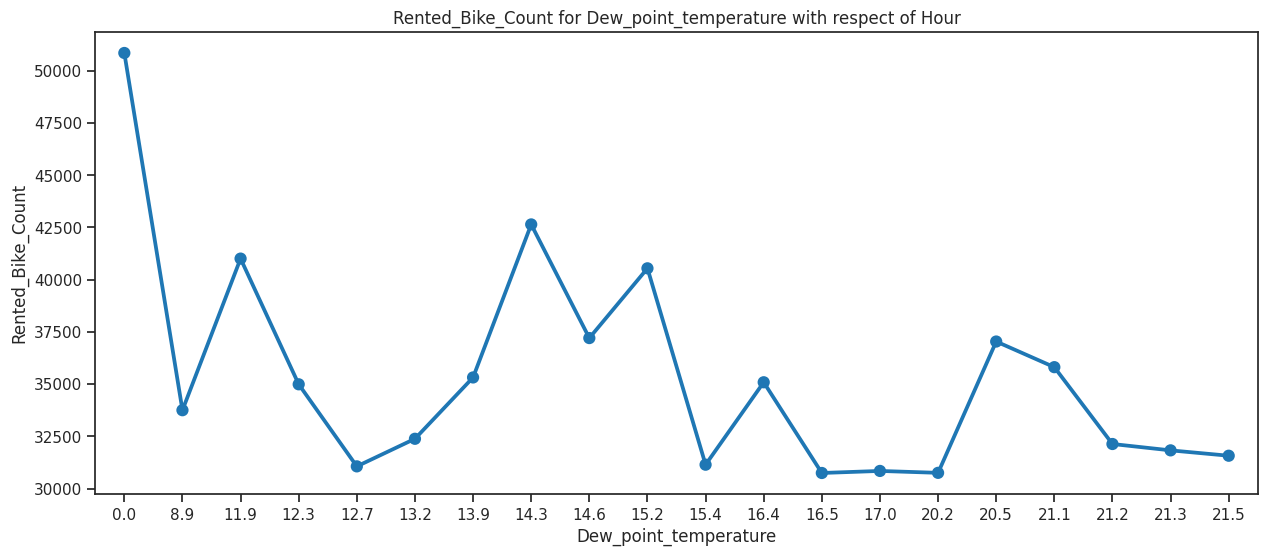

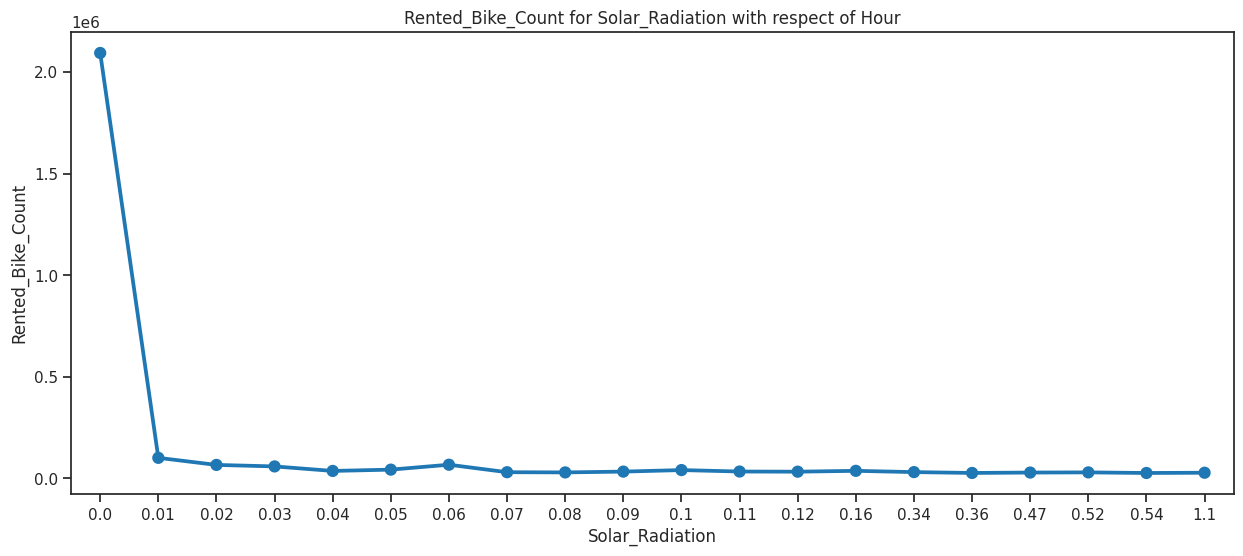

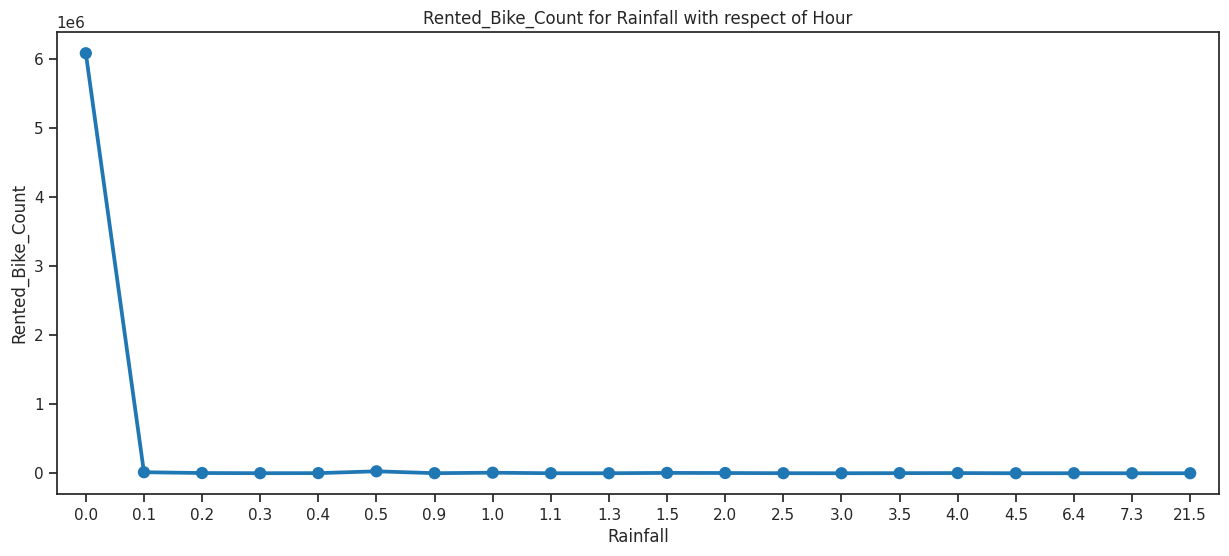

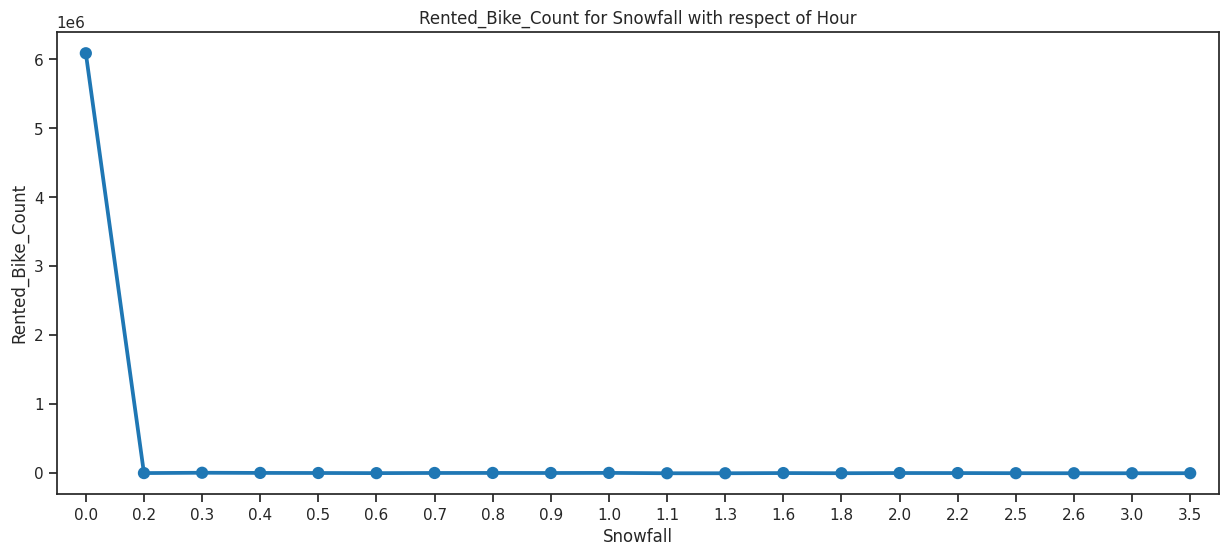

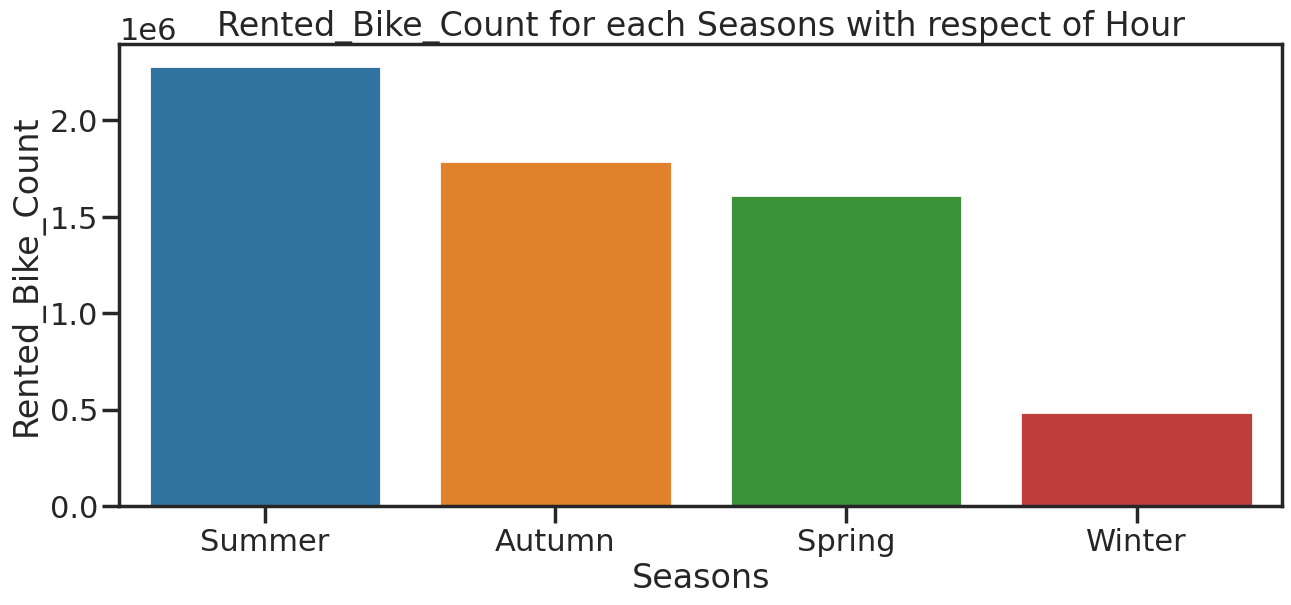

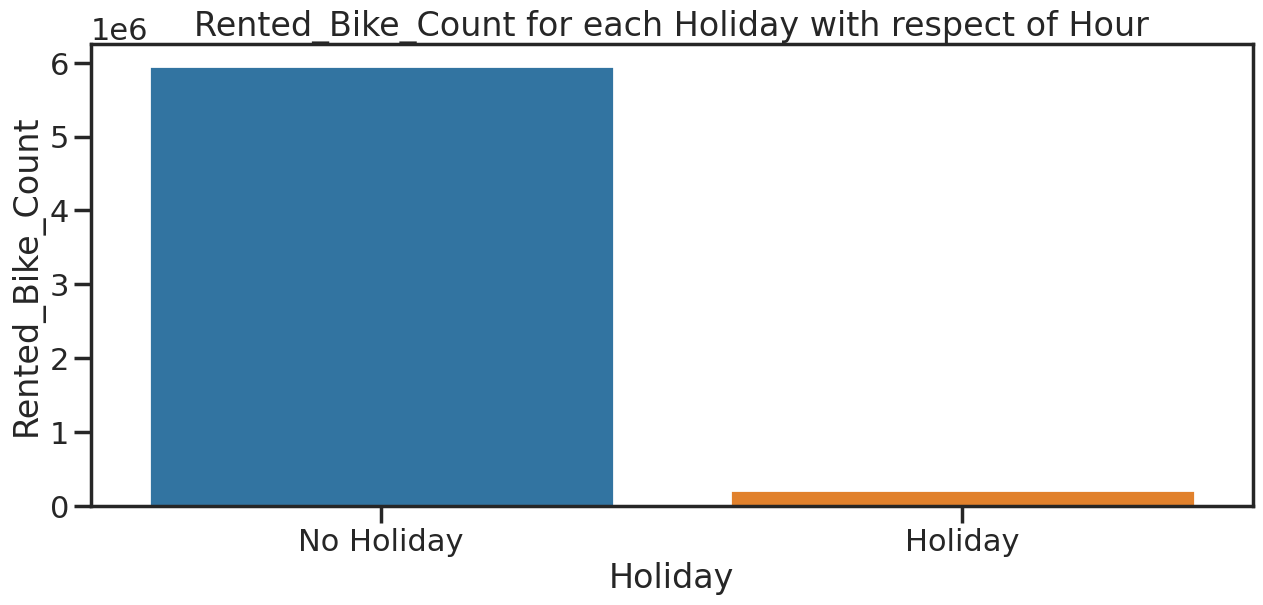

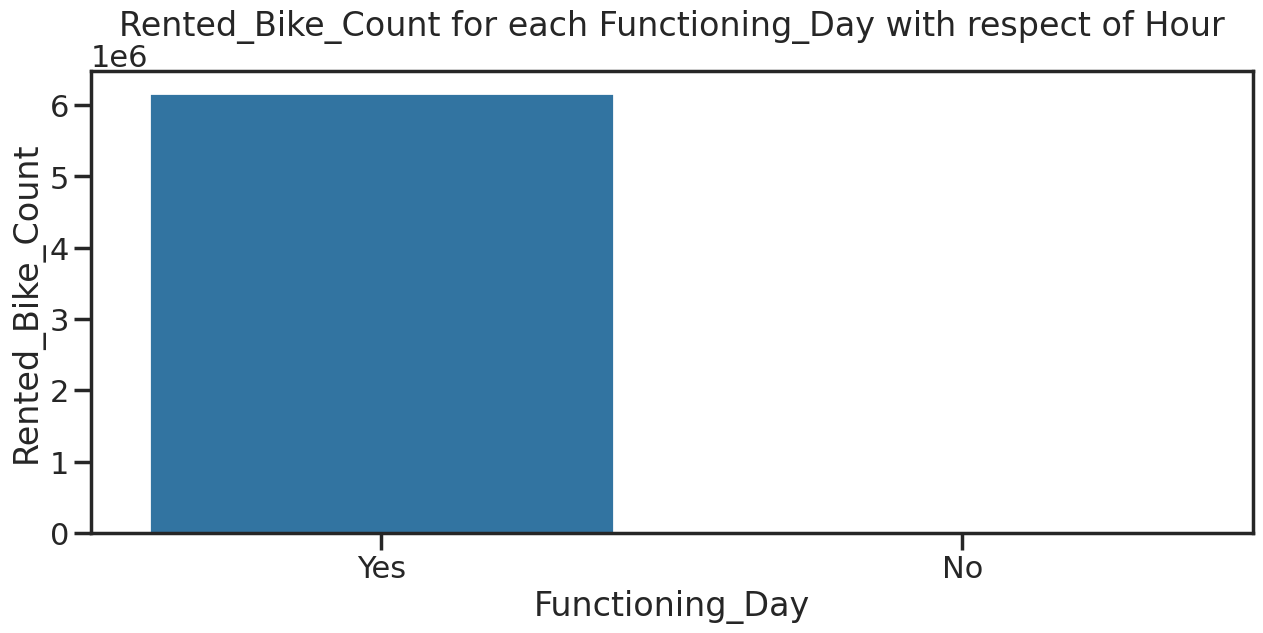

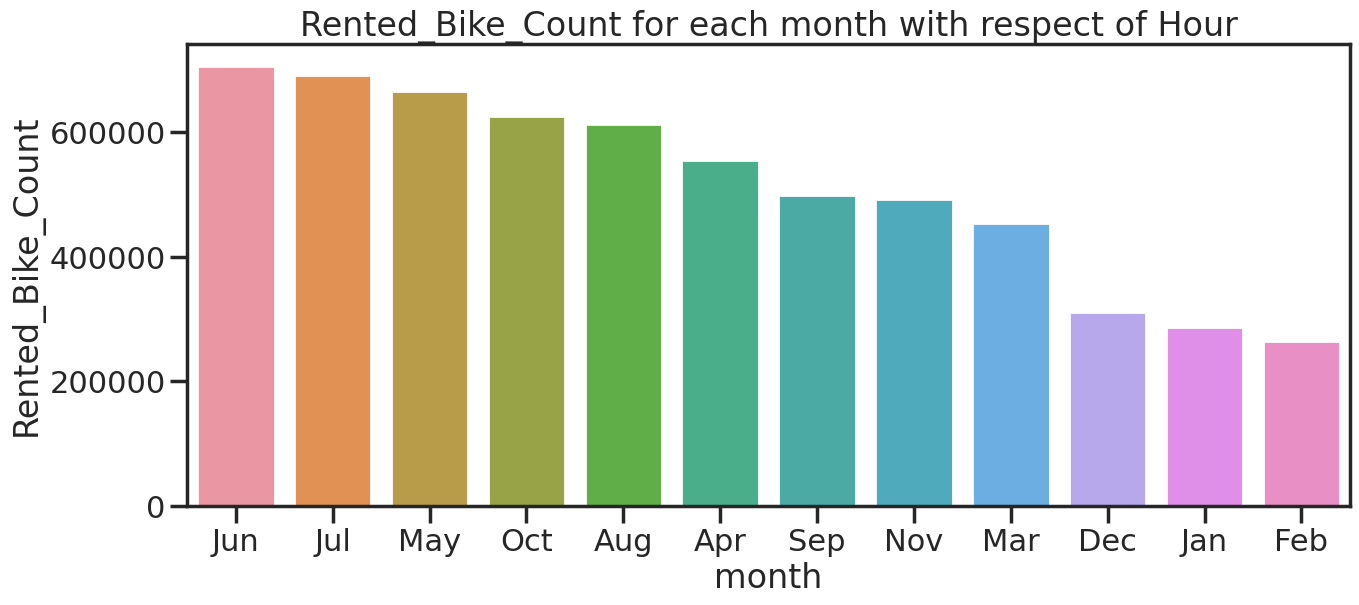

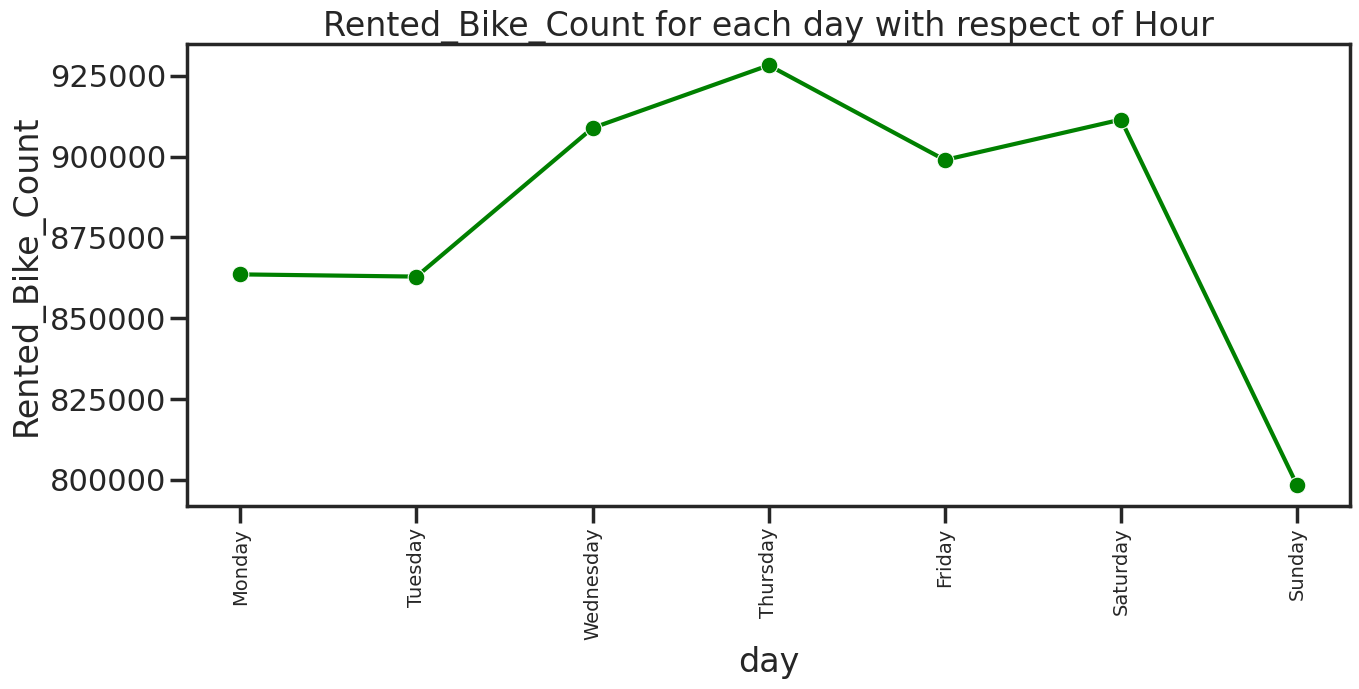

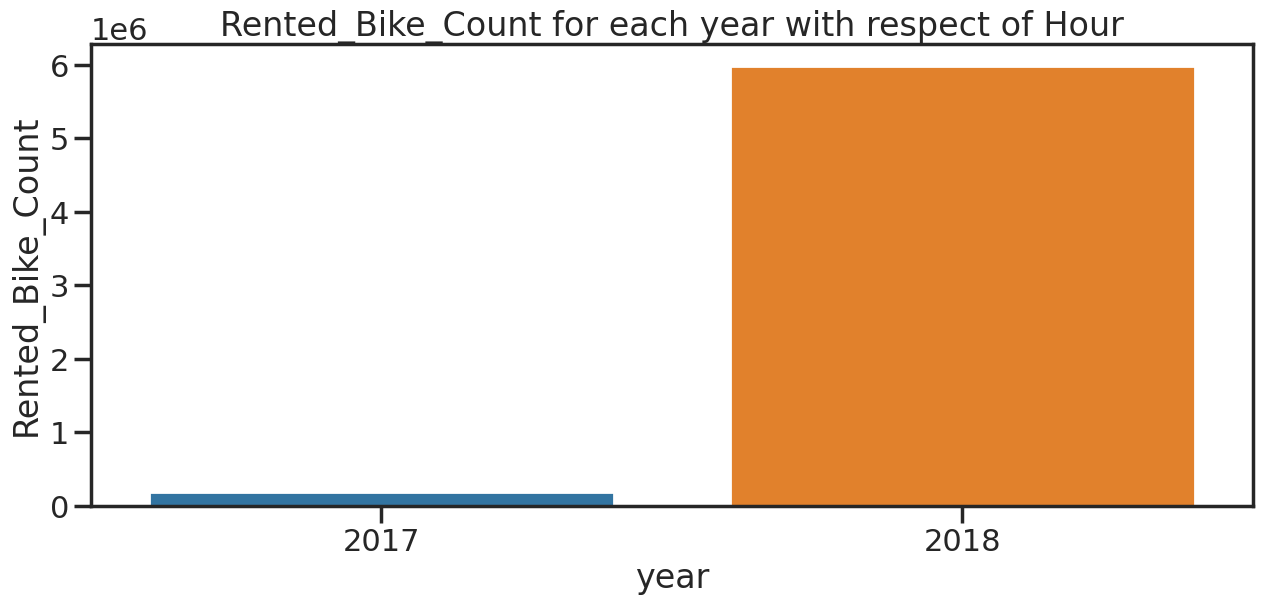

In [34]:
#comparing different feature with bike count 
for i in dfr.columns:
  plt.figure(figsize=(15,6))
  if i == 'Rented_Bike_Count':
    pass
  elif i in ['Seasons','Holiday','Functioning_Day','month','year']:
    grp = dfr.groupby([i], as_index = False)['Rented_Bike_Count'].sum().sort_values('Rented_Bike_Count',
                                                                                    ascending = False)
    sns.set_context('poster');
    sns.barplot(x=grp[i], y=grp["Rented_Bike_Count"]);
    plt.title(f"Rented_Bike_Count for each {i} with respect of Hour");
    print('\n')
  elif i == 'day':
    workingdays = {'day':['Monday','Tuesday','Wednesday','Thursday','Friday',	'Saturday',	'Sunday']}
    workingday = pd.DataFrame(workingdays)
    grp = dfr.groupby([i], as_index = False)['Rented_Bike_Count'].sum().sort_values('Rented_Bike_Count',
                                                                                    ascending = False)
    chart = workingday.merge(grp)
    sns.set_context('poster');
    sns.lineplot(data= chart, x=chart[i],y= chart['Rented_Bike_Count'], marker= 'o', color = 'green');
    plt.xticks(fontsize = 14, rotation = 90);
    plt.title(f"Rented_Bike_Count for each {i} with respect of Hour");
  else :
    grp = dfr.groupby([i], as_index = False)['Rented_Bike_Count'].sum().sort_values('Rented_Bike_Count',
                                                                                    ascending = False).head(20)
    sns.set_context('notebook');
    sns.pointplot(x=grp[i], y=grp["Rented_Bike_Count"]);
    plt.title(f"Rented_Bike_Count for {i} with respect of Hour");
    print('\n')

  plt.show()

If we consider features like year, Functioning_Day, holiday, and season, it is suggested to review their values separately. Specifically, it would be beneficial to focus on Functioning_Day and holiday due to their categorical nature. By examining their values individually, we can gain a better understanding of their distinct categories and their impact on the dataset.

In [35]:
#groupby function for finding sum with respect to categorial features
def group_by(df,feature):
  data = df.groupby([feature], as_index = False)['Rented_Bike_Count'].sum().sort_values('Rented_Bike_Count', ascending = False)
  return data

In [36]:
#Rented_Bike_Count with respect to Functioning_Day
group_by(dfr,'Functioning_Day')

Functioning_Day  Rented_Bike_Count
1             Yes            6172314
0              No                  0

In [37]:
#Rented_Bike_Count vs holiday
group_by(dfr,'Holiday')

Holiday  Rented_Bike_Count
1  No Holiday            5956419
0     Holiday             215895

In [38]:
#Rented_Bike_Count with respect to year
group_by(dfr,'year')

year  Rented_Bike_Count
1  2018            5986984
0  2017             185330

In [39]:
#Rented_Bike_Count with respect to season
group_by(dfr,'Seasons')

Seasons  Rented_Bike_Count
2  Summer            2283234
0  Autumn            1790002
1  Spring            1611909
3  Winter             487169

In [40]:
#Rented_Bike_Count with respect to day
weekend = group_by(dfr,'day')
chutti = weekend[(weekend['day'] == 'Saturday') | (weekend['day'] == 'Sunday')]
chutti

day  Rented_Bike_Count
2  Saturday             911475
3    Sunday             798295

In [41]:
#Rented_Bike_Count with respect to day
workingday = group_by(dfr,'day')
office = workingday[(workingday['day'] != 'Saturday') & (workingday['day'] != 'Sunday')]
office

day  Rented_Bike_Count
4   Thursday             928267
6  Wednesday             908871
0     Friday             898966
1     Monday             863563
5    Tuesday             862877

In [42]:
#checking total bike rented count of workingday vs weekend
d = office['Rented_Bike_Count'].sum() > chutti['Rented_Bike_Count'].sum()
print(f' Is it true that bike rented count is more on working day? {d}')

 Is it true that bike rented count is more on working day? True


* If it is a non Functioning_Day, total bike rented count is zero. Therefore, taking two approach to see which can give better result. First, with taking all values, secondly by removing nonfunctioning day value and then removing entire column. But, before taking any step it is better to find correlation of the column with our target( Rented_Bike_Count) column.

In [43]:
copy_for_future = dfr.copy()
trial = dfr.copy()

In [44]:
#changing yes-1 and no-0 for calculation of correlation
trial['Functioning_Day']= LabelEncoder().fit_transform(trial['Functioning_Day'])

In [45]:
trial['Functioning_Day'].value_counts()

1    8465
0     295
Name: Functioning_Day, dtype: int64

In [46]:
# finding correlation between functioning day and rented bike count
corr = trial[['Rented_Bike_Count','Functioning_Day']].corr()
corr

Rented_Bike_Count  Functioning_Day
Rented_Bike_Count              1.000            0.204
Functioning_Day                0.204            1.000

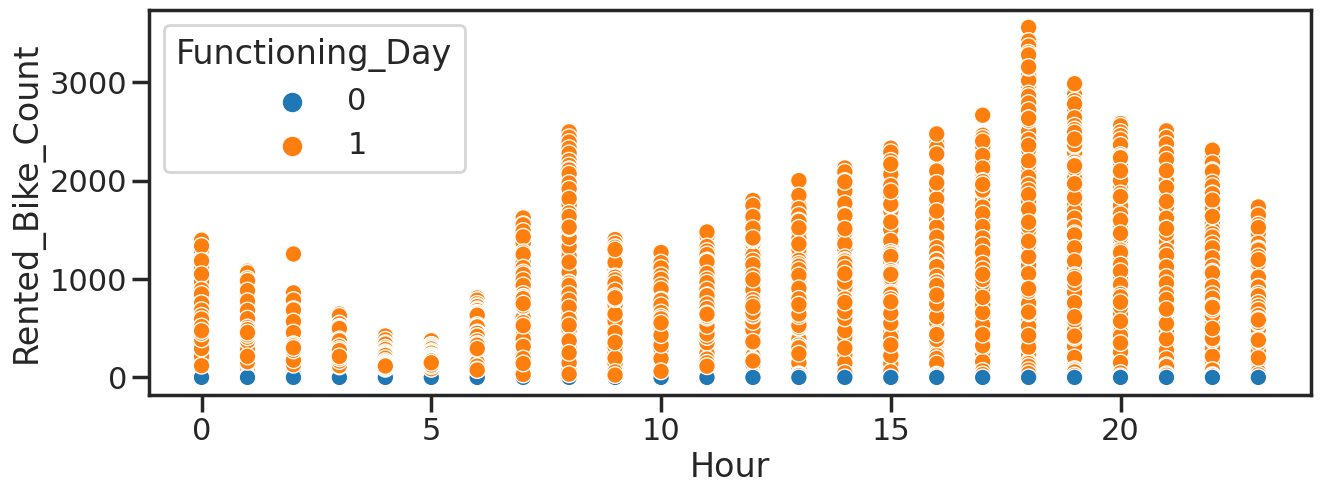

In [47]:
#plotting scatter plot for rented bike count and functioning day
plt.figure(figsize = (15,5));
sns.scatterplot(data = trial[['Rented_Bike_Count','Hour','Functioning_Day']], x = trial['Hour'], y = trial['Rented_Bike_Count'], hue = trial['Functioning_Day']);


* 0 - No functional day
* 1 - Functioning day

Hence from correlation, it is clear that functioning day show very low positive correlation of only 0.2, therefore will approaching the second method i.e., deleting the non functioning values and then delecting the column.

In [48]:
#Removing data of non functional days with no rented bike
value = dfr.drop(dfr[dfr['Functioning_Day'] == 'No'].index)

In [49]:
value['Functioning_Day'].value_counts()

Yes    8465
Name: Functioning_Day, dtype: int64

In [50]:
#Removing entire functional day column as it of no use
value = value.drop(['Functioning_Day'], axis = 1)
value.shape

(8465, 15)

In [51]:
#shape of new dataset 
print(f'Shape of original data: {copy_for_future.shape}')
print(f'Shape of new data : {value.shape}')

Shape of original data: (8760, 16)
Shape of new data : (8465, 15)


From the analysis and observations made from the above graph, we can conclude the following points:

1) Non-Functioning Days: On non-functioning days, the count of rented bikes is zero. This suggests that there is no demand for rented bikes on such days.

2) Seasonal Variation: There is a decrease in bike demand as the season changes from summer to winter. This implies that the demand for bikes is higher in warmer seasons compared to colder seasons.

3) Monthly Demand: The analysis of bike demand plotted against months shows a gradual decrease in demand as we transition from summer to winter. The lowest demand is observed in February, indicating a seasonal trend.

4) Holiday vs. Working Day: Bike demand is lower on holidays compared to working days. This suggests that people tend to rent fewer bikes on holidays.

5) Weekly Demand: The demand for bikes gradually increases throughout the week. However, there is a dip in demand on weekends, which can be used as a basis to categorize days as working days and weekends.

These observations provide insights into the factors influencing bike demand, such as functioning days, seasonality, monthly variations, and the impact of holidays and weekends.

In [52]:
# Converting day of weeks in Two variable from Monaday to Friday in workingdays and Saturday and Sunday to Weekend
value['week'] = value['day'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'workingdays')

In [53]:
value.week.value_counts()

workingdays    6024
Weekend        2441
Name: week, dtype: int64

#### **Multivariate Analysis**

In [54]:
#getting categorial values
cat_feature = value.select_dtypes(include='object')

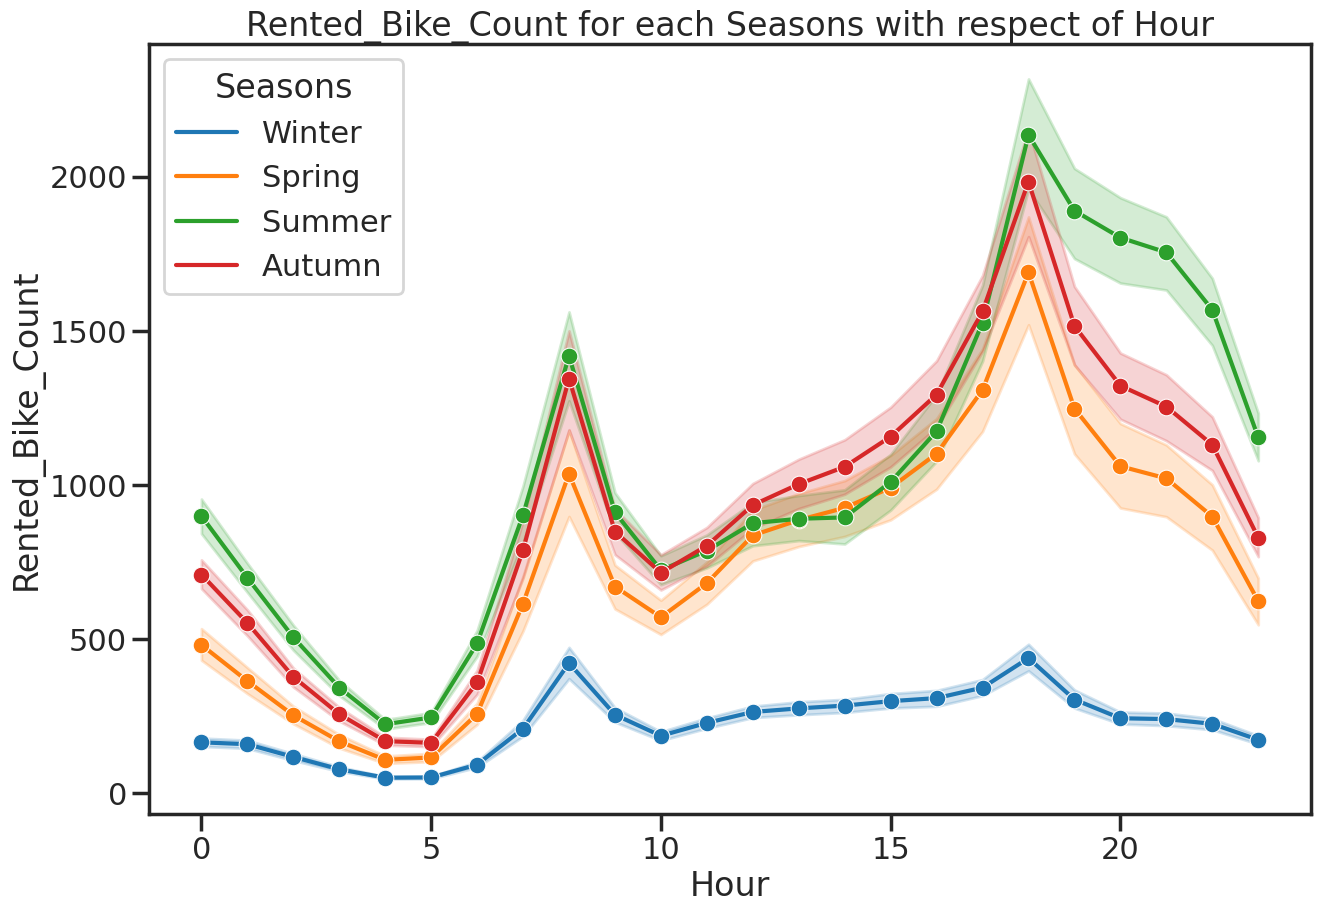

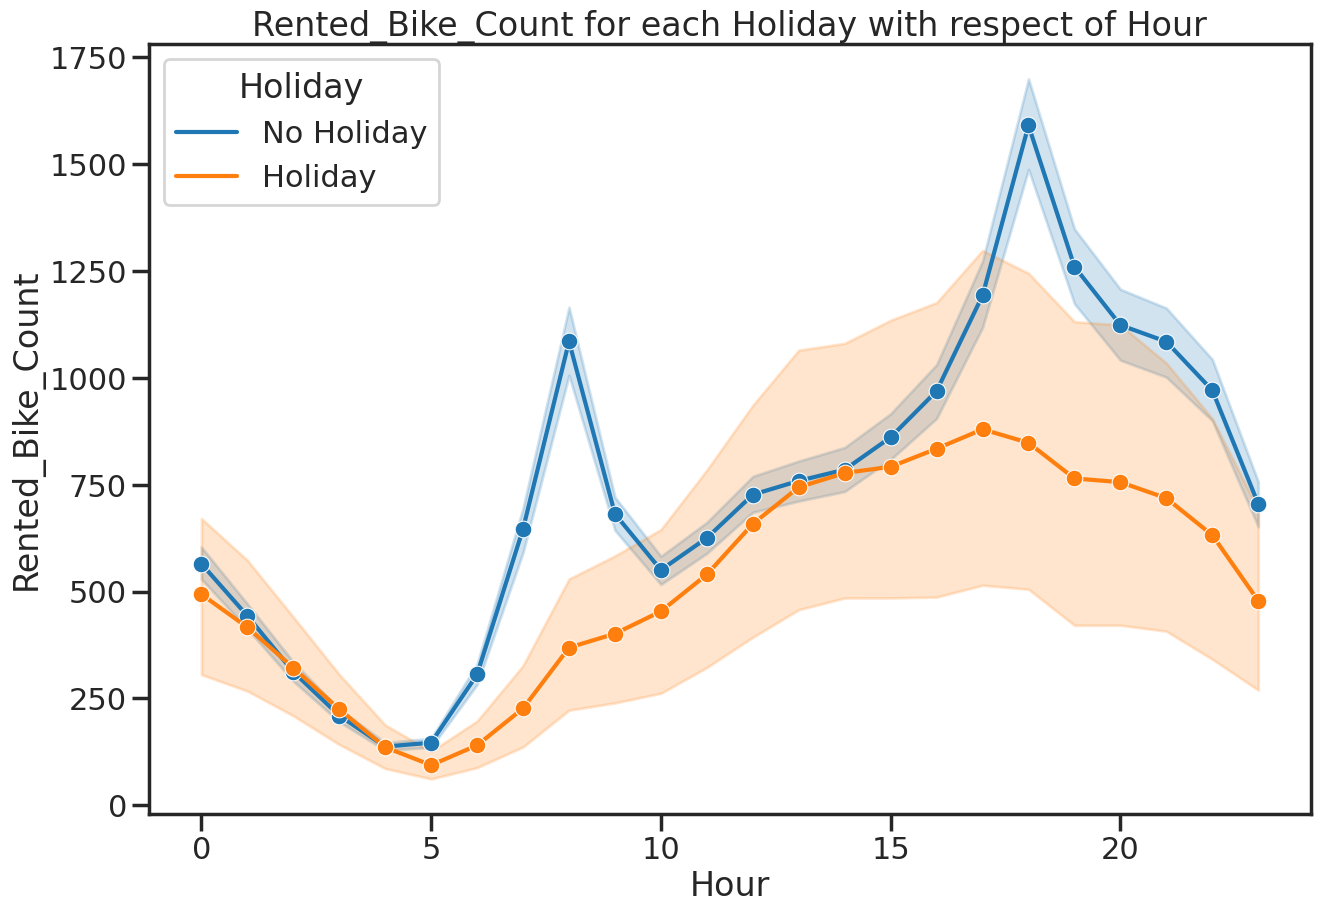

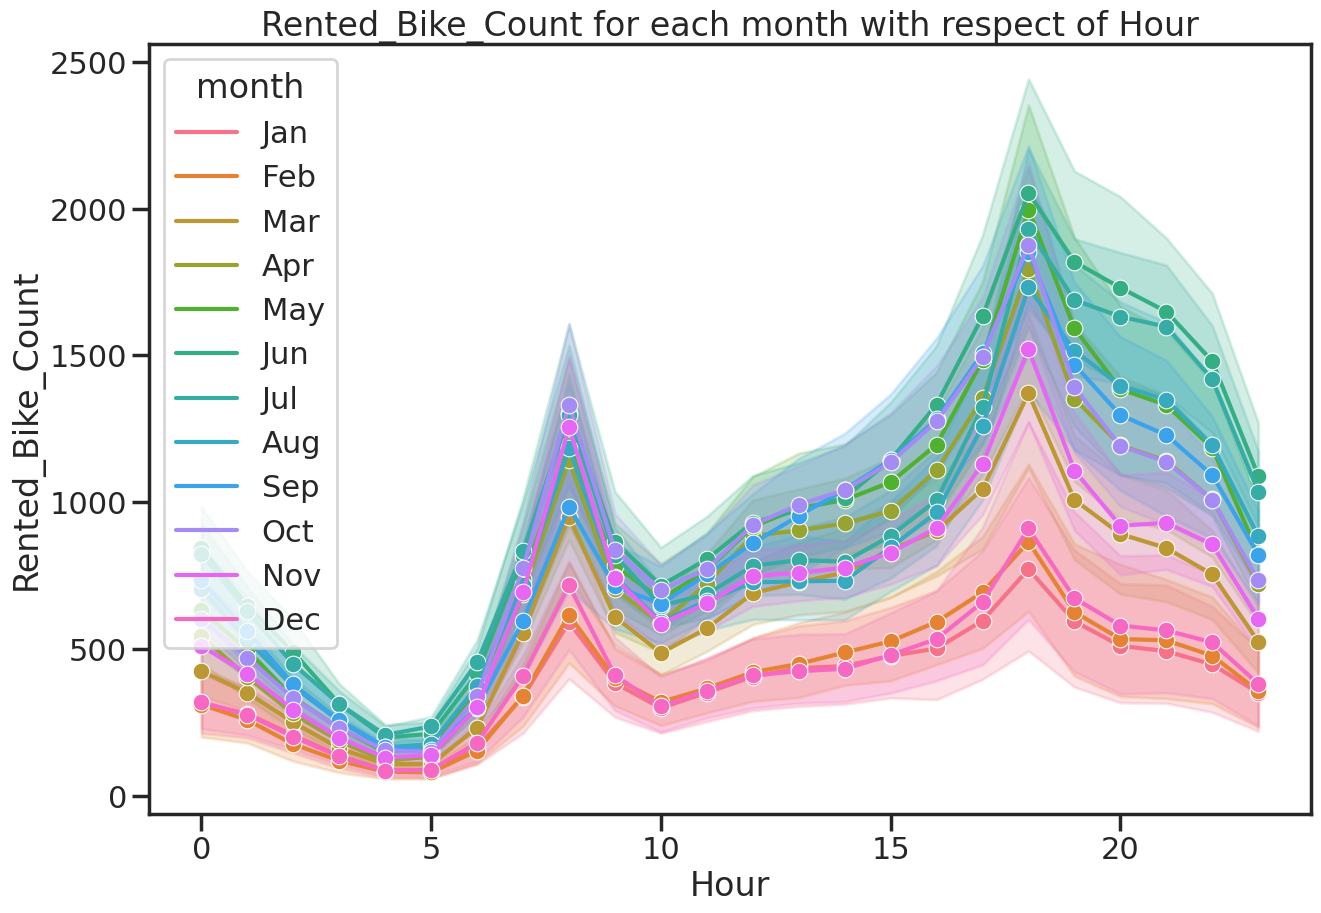

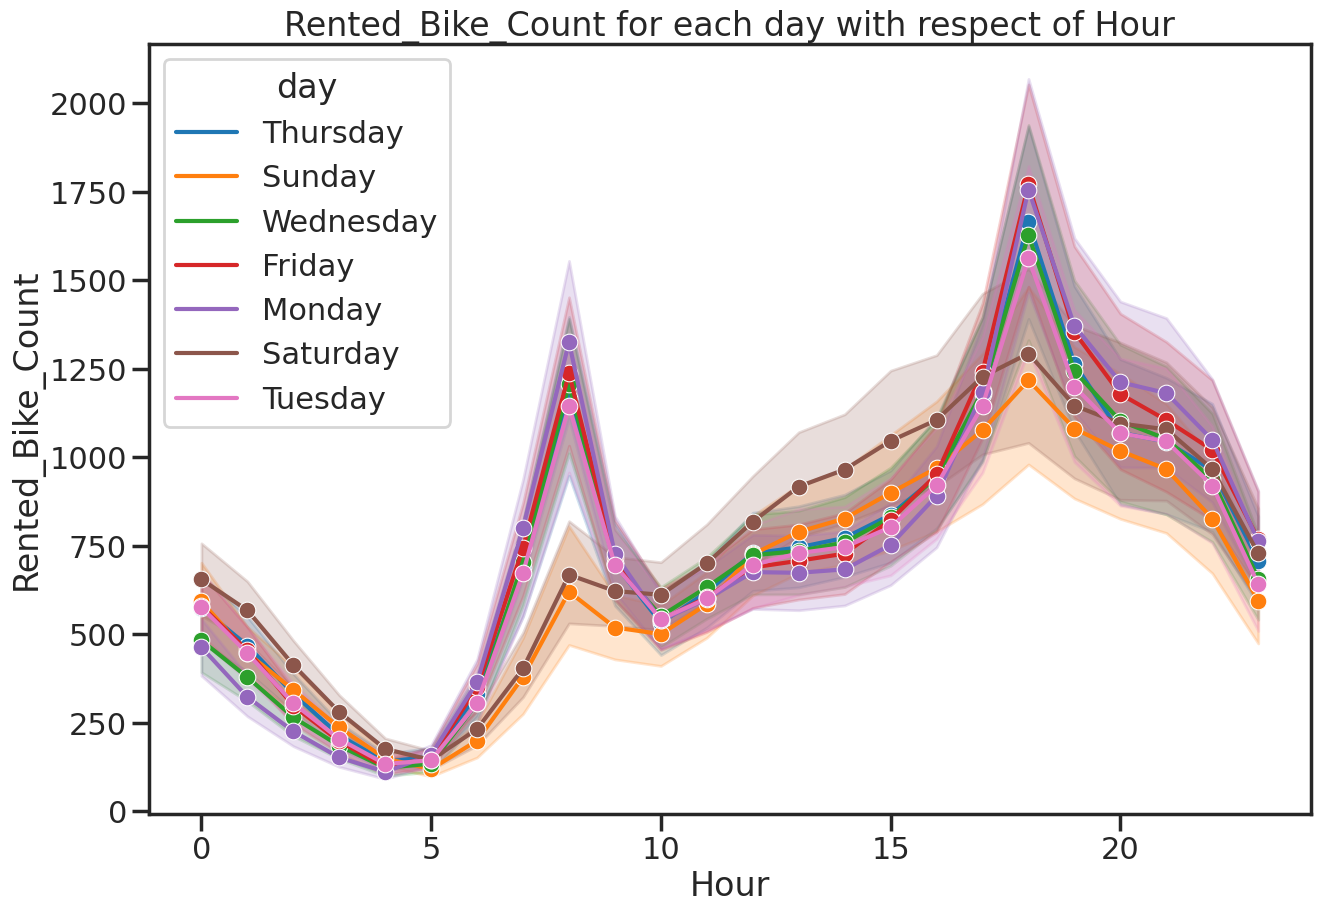

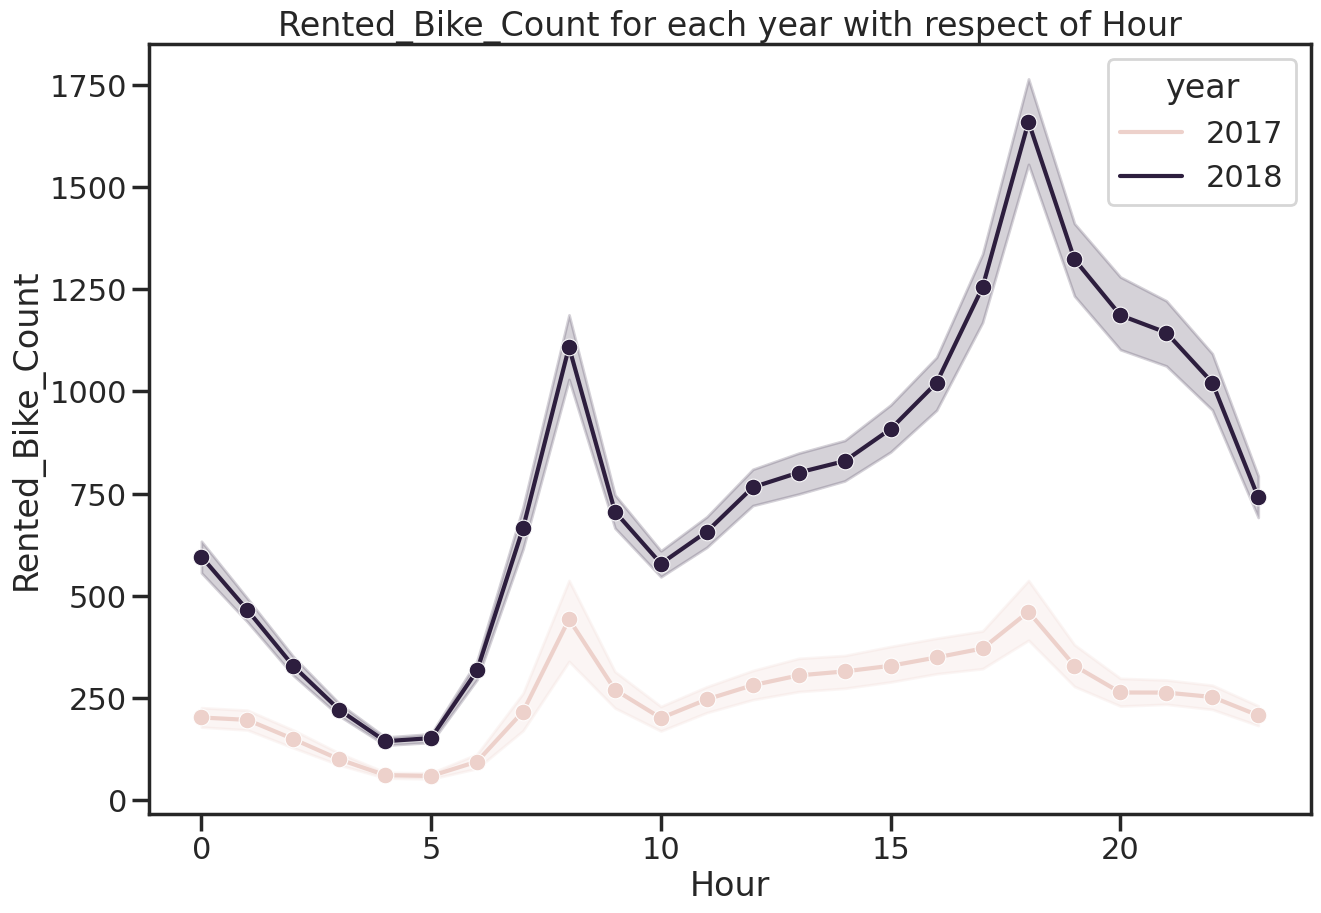

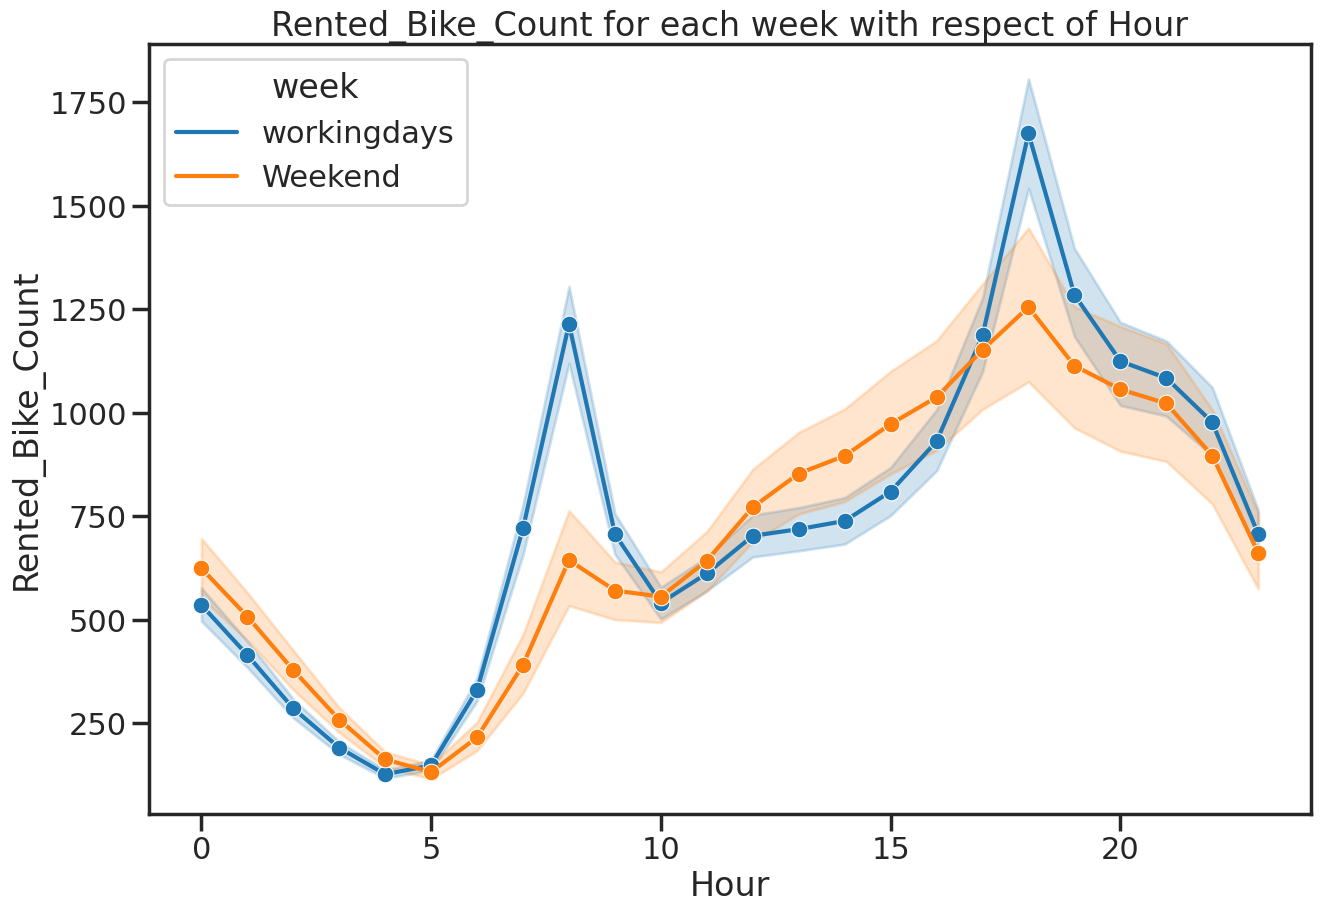

In [55]:
#analysing hour with bike demand with respect to different third value

for i in cat_feature:
  if i == 'Hour':
    pass
  else:
    plt.figure(figsize=(15,10))
    sns.lineplot(x=value["Hour"],y=value['Rented_Bike_Count'],hue=value[i], marker ='o')
    plt.title(f"Rented_Bike_Count for each {i} with respect of Hour")
  plt.show()

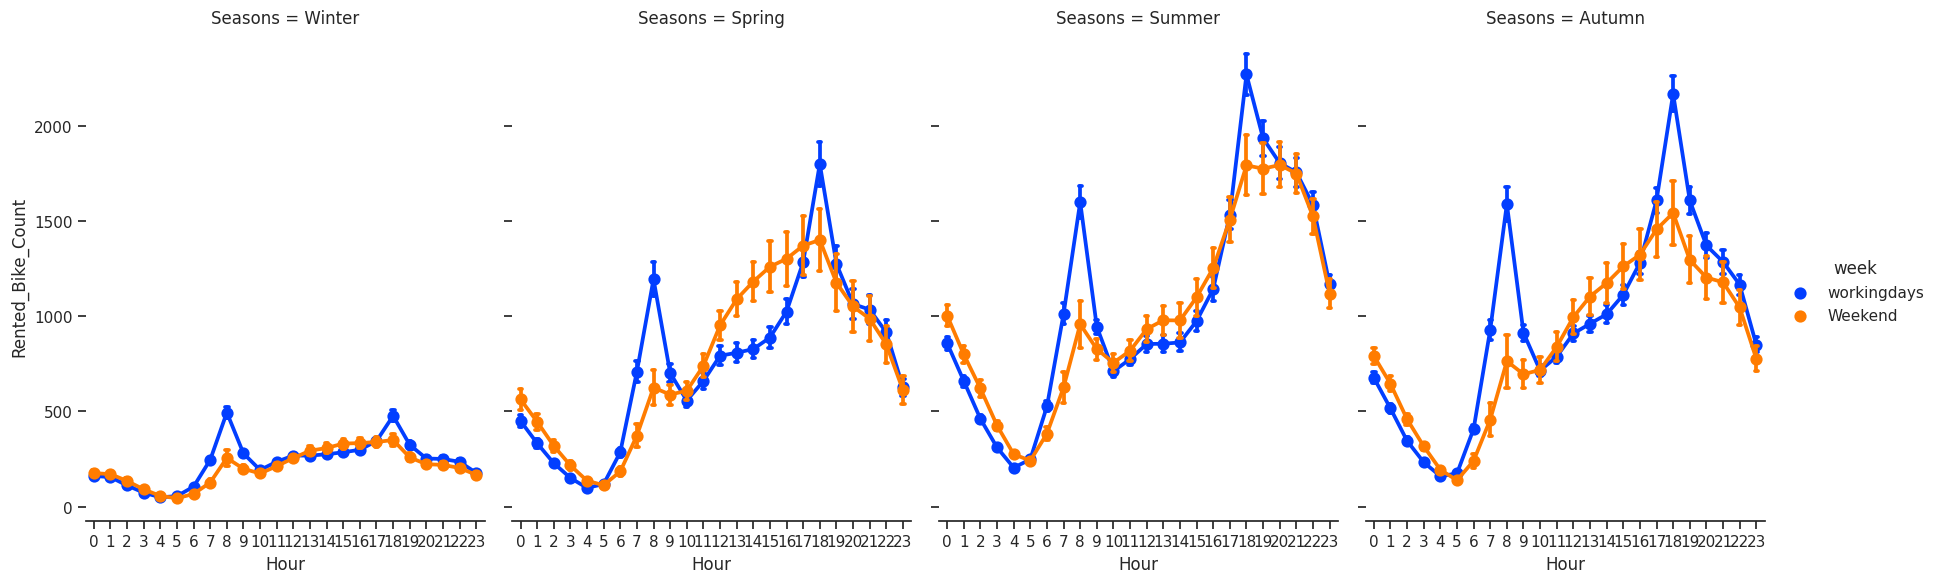

In [56]:
# Draw a pointplot to show bike demand as a function of three categorical factors(season,week, hour)
sns.set_context('notebook')
g = sns.catplot(
    data= value, x="Hour", y="Rented_Bike_Count", hue="week", col="Seasons",
    capsize=.2, palette="bright", errorbar="se",
    kind="point", height=6, aspect=.75,
);
g.despine(left=True);



* For every season,bike count is high on working day compared to weekends, i.e., demand on workingday is more.

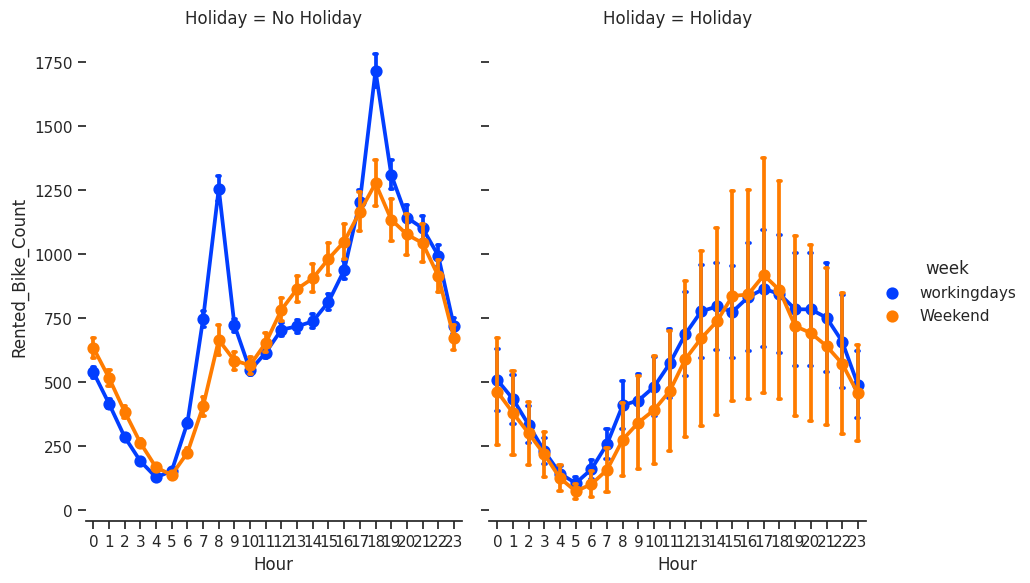

In [57]:
# Draw a pointplot to show bike demand as a function of three categorical factors(hour, week, holiday)
sns.set_context('notebook')
g = sns.catplot(
    data= value, x="Hour", y="Rented_Bike_Count", hue="week", col="Holiday",
    capsize=.2, palette="bright", errorbar="se",
    kind="point", height=6, aspect=.75,
);
g.despine(left=True);

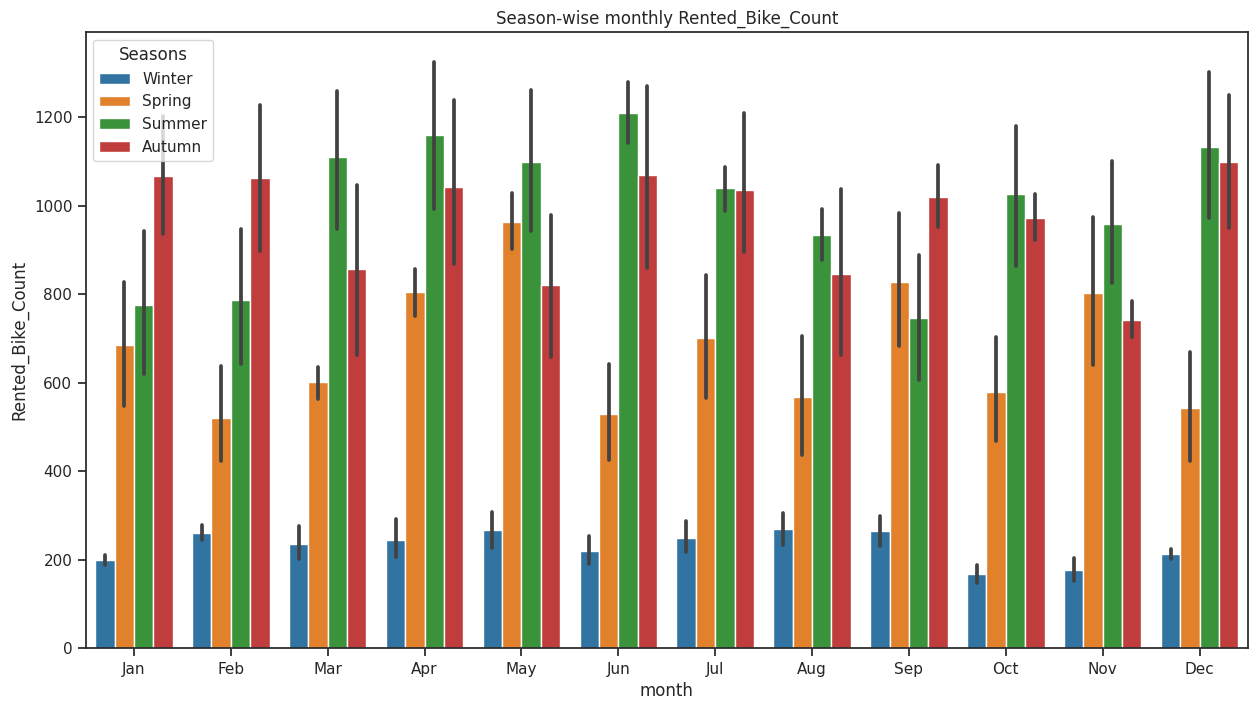

In [58]:
#Bar plot for seasonwise monthly distribution of Rented_Bike_Count
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='Rented_Bike_Count',data=value, hue='Seasons',ax=ax);
ax.set_title('Season-wise monthly Rented_Bike_Count');
plt.show();

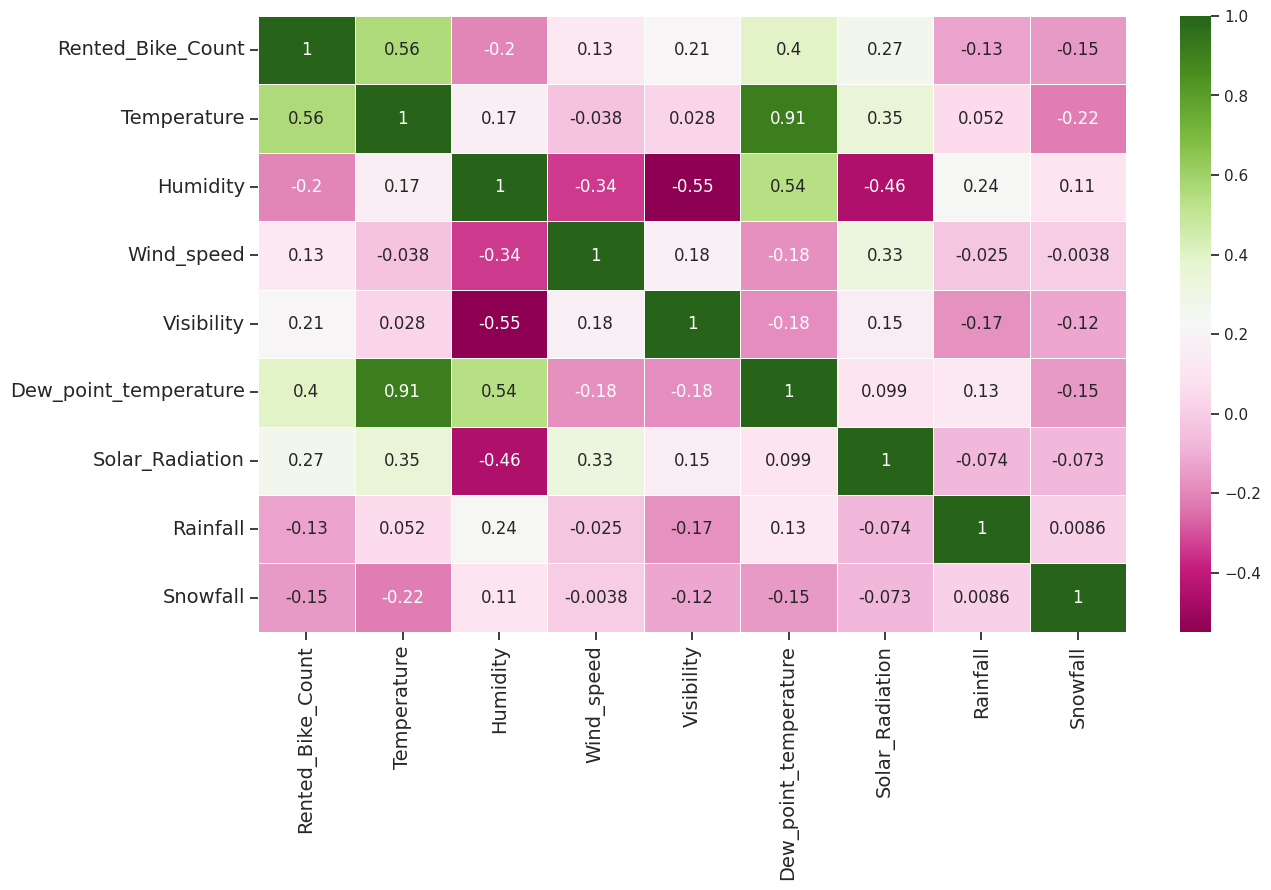

In [59]:
# plotting heatmap with correlation value to check relation between multiple variable
sns.set_context('notebook')
plt.figure(figsize = (14,8))
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
sns.heatmap(value.corr(), annot=True, linewidth=.5,cmap="PiYG");

* When two variables or features exhibit a relationship, either in the same or opposite direction, it indicates a correlation between them. In the given context, the feature "Temperature (°C)" and "Dew point temperature (°C)" show a correlation. Generally, an absolute correlation coefficient greater than 0.7 between two or more predictors suggests the presence of multicollinearity.

* However, it is important to note that the statement "Without functioning day column it shows better correlation" requires clarification. Removing the functioning day column might affect the correlation between temperature and dew point temperature in some cases, but it does not guarantee a better correlation. The correlation between these variables should be determined by analyzing the data and calculating the correlation coefficient.

* To assess the presence of multicollinearity accurately, it is recommended to examine the correlation matrix or perform a more comprehensive analysis, such as variance inflation factor (VIF) calculations or principal component analysis (PCA), to identify potential multicollinearity issues among the predictors.

### **CONCLUSION**

* Based on the above EDA, the following conclusions can be drawn:

1). Skewness:

* Rented_Bike_Count, Wind_speed, and Solar Radiation (MJ/m2) exhibit positive skewness. This indicates that the distributions of these features are skewed towards higher values.
* Visibility (10m) shows negative skewness, suggesting that the distribution is skewed towards lower visibility values.


2). Time of Day:

* The demand for bikes is higher during morning and evening hours, specifically around 7-9 am in the morning and 6-8 pm in the evening. This indicates that bike usage is more frequent during commuting hours.

3). Day of the Week:

* The demand for bikes is generally higher on working days compared to weekends. This implies that people tend to rent more bikes for commuting or work-related purposes during weekdays.

4). Non-Functioning Days:

* On non-functioning days, the demand for bikes is zero. This suggests that there is no bike rental activity on these days.

5). Holidays:

* The demand for bikes is lower on holidays compared to regular days. This implies that bike rentals may be influenced by factors such as people engaging in different activities or being on vacation during holidays.

6). Seasonal Variation:

* The demand for bikes is higher during summer compared to winter. This indicates a seasonal trend where more people rent bikes for outdoor activities or leisure during the summer season.


These conclusions provide valuable insights into the patterns and dynamics of bike rentals, allowing for a better understanding of the factors that affect bike demand.

## **Feature Engineering**

### **Outliers**

In [60]:
#checking outliers using box plot
def box_plot(df,feature):
  i=1
  for col in feature.columns :
    plt.figure(figsize = (20,18))
    plt.subplot(5,2,i);
    i=i+1
    if df[col].dtypes == 'object':
      sns.boxplot(x=df[col],y=df["Rented_Bike_Count"]);
      print('\n')
    else:
      sns.boxplot(df[col]);
      print('\n')
    plt.xticks(fontsize = 18, rotation = 90);
    plt.tight_layout();

In [61]:
cat_feature = value.select_dtypes(include ='object')

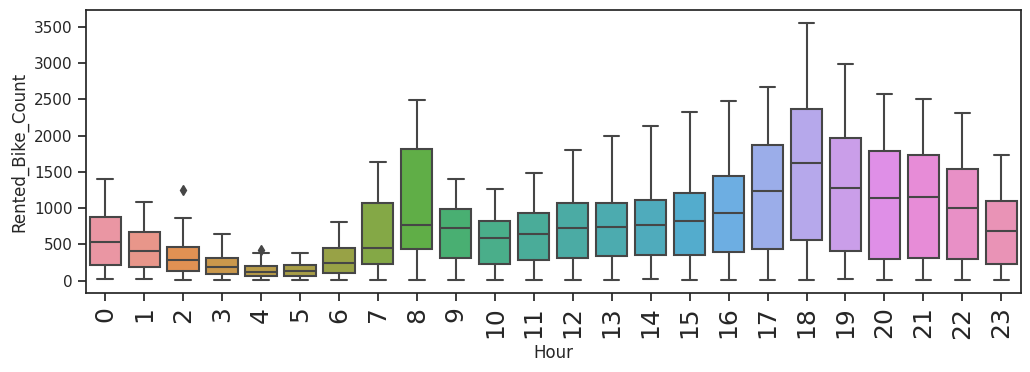

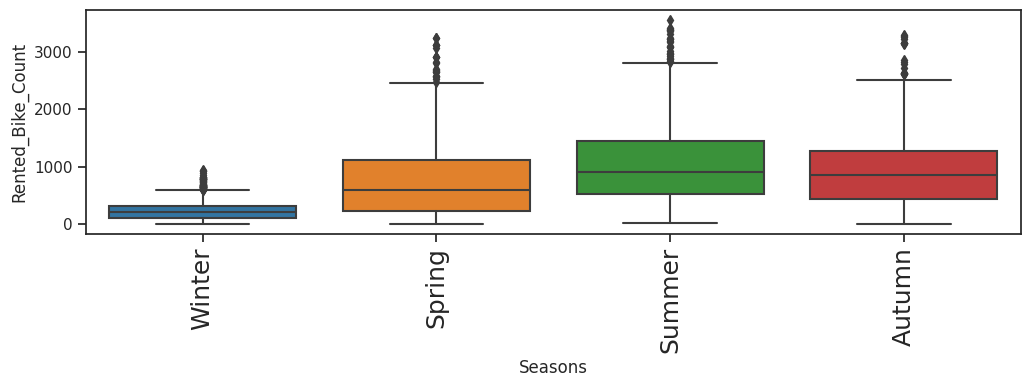

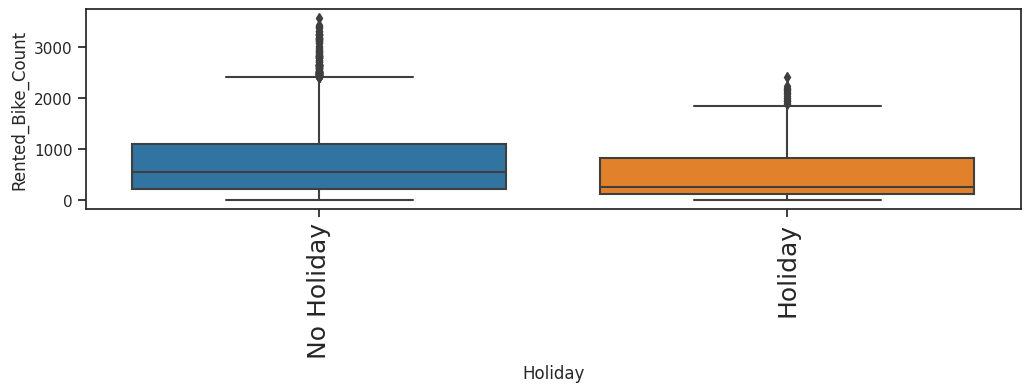

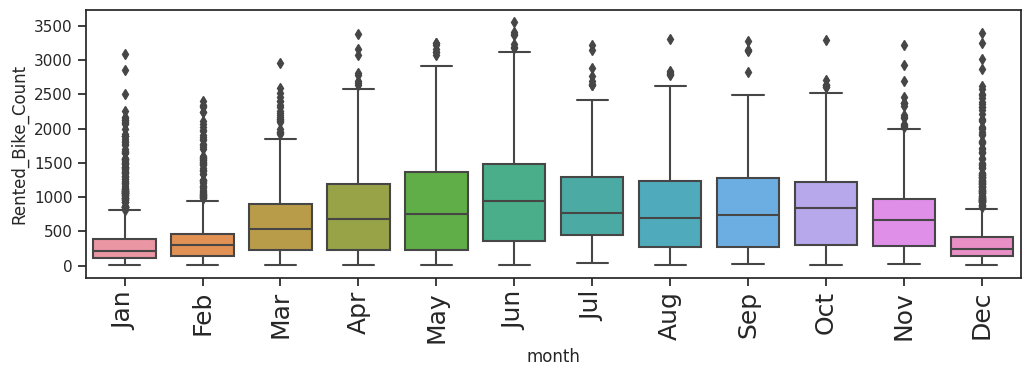

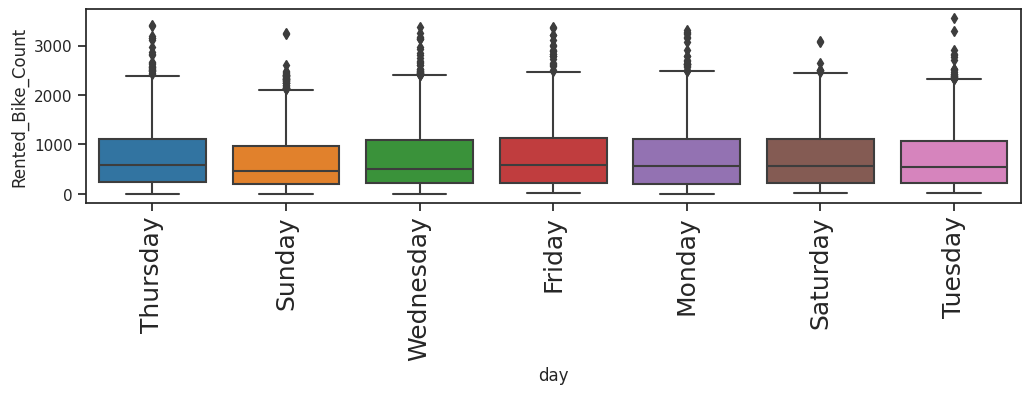

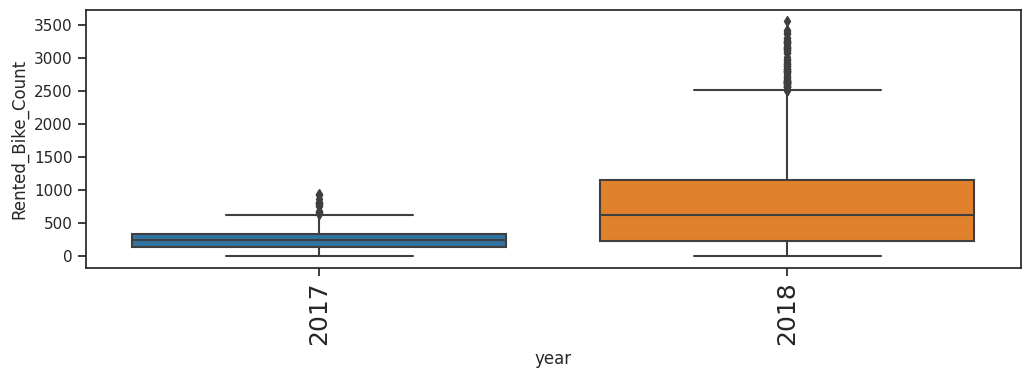

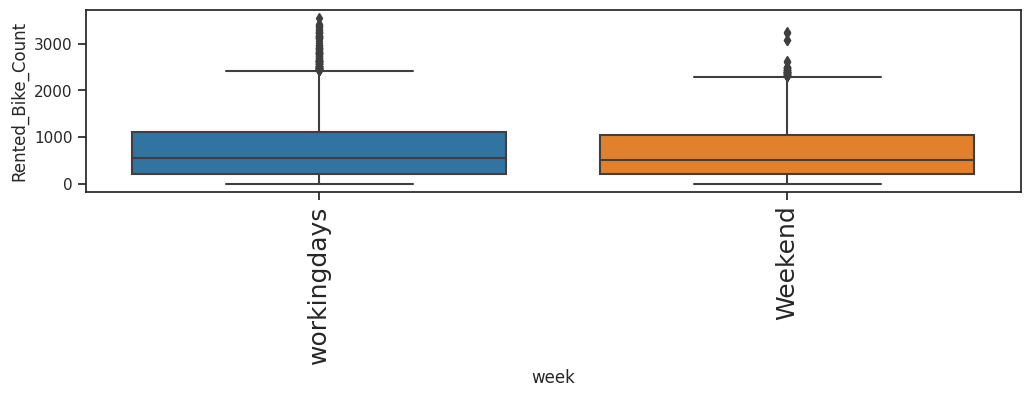

In [62]:
box_plot(value,cat_feature)

In [63]:
num_feature = value.select_dtypes(exclude = 'object')

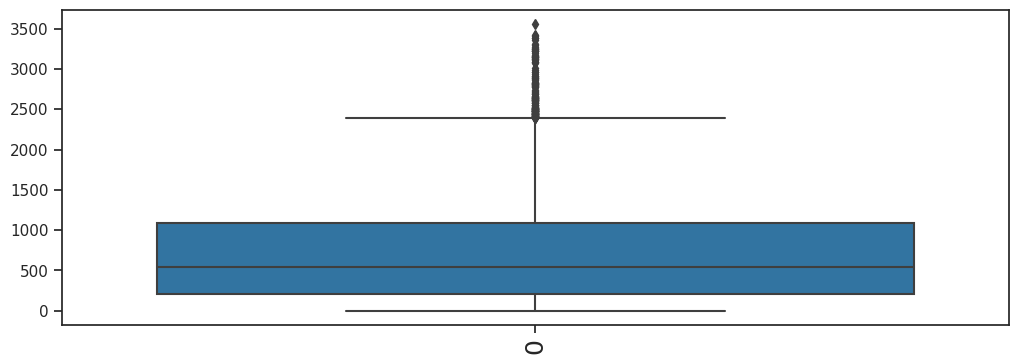

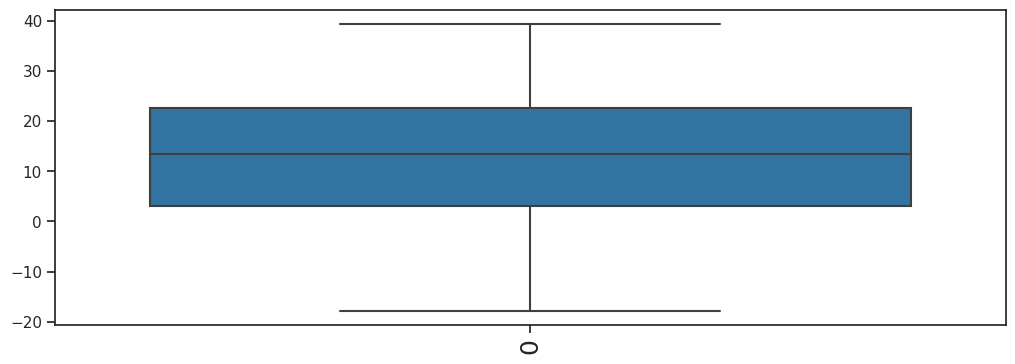

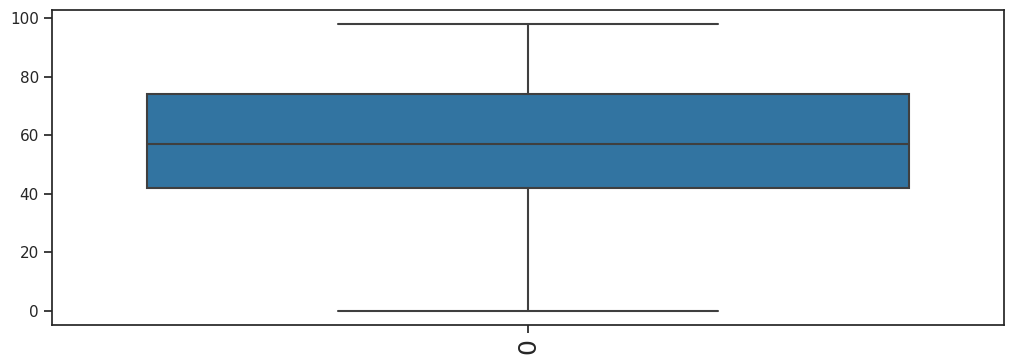

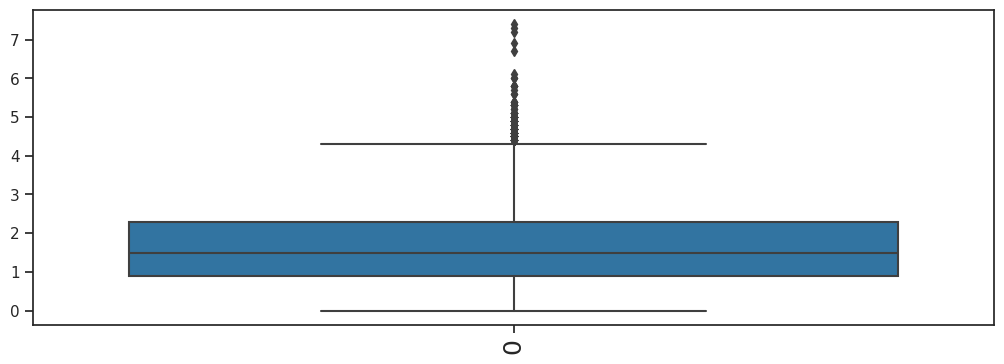

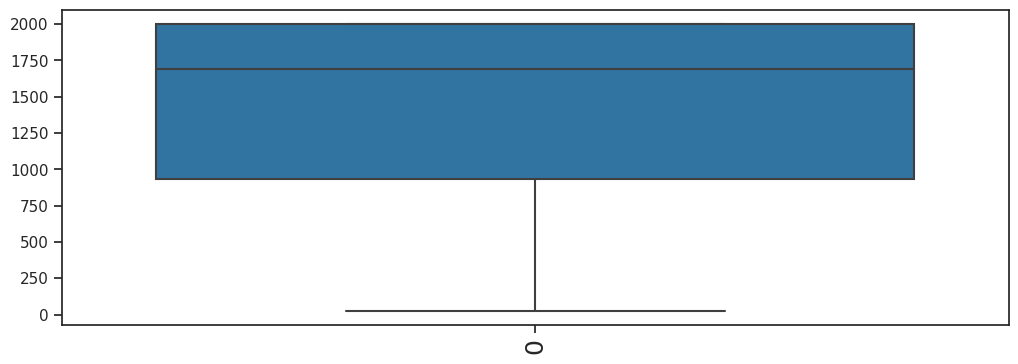

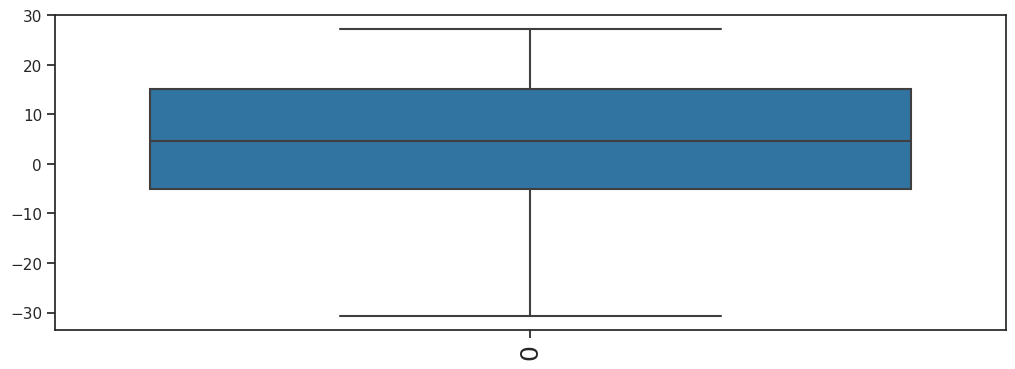

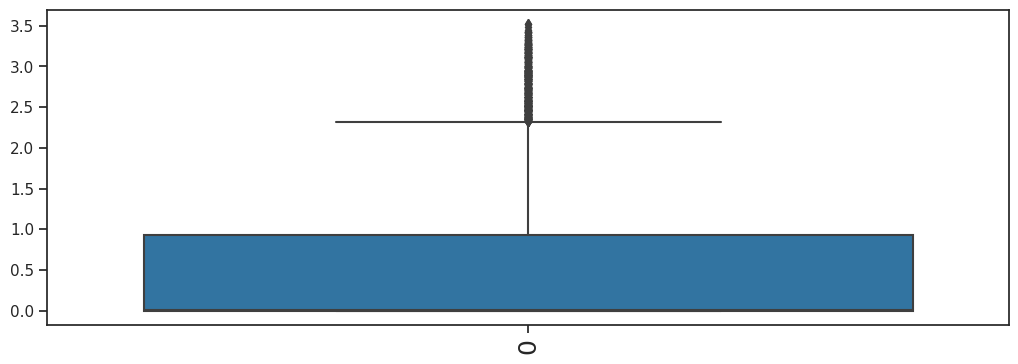

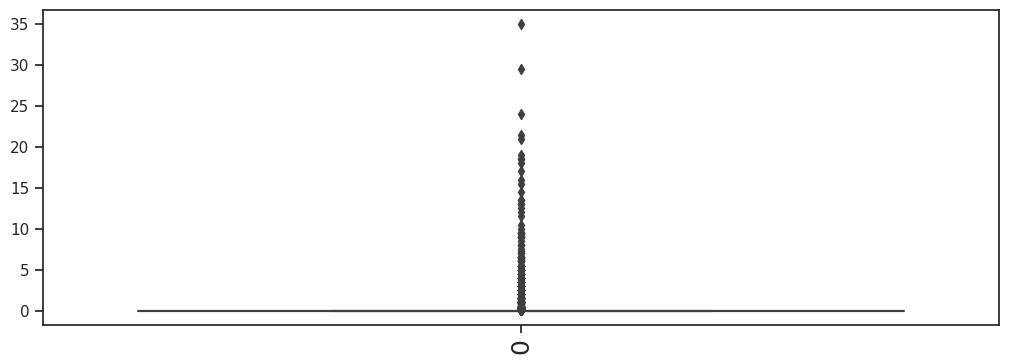

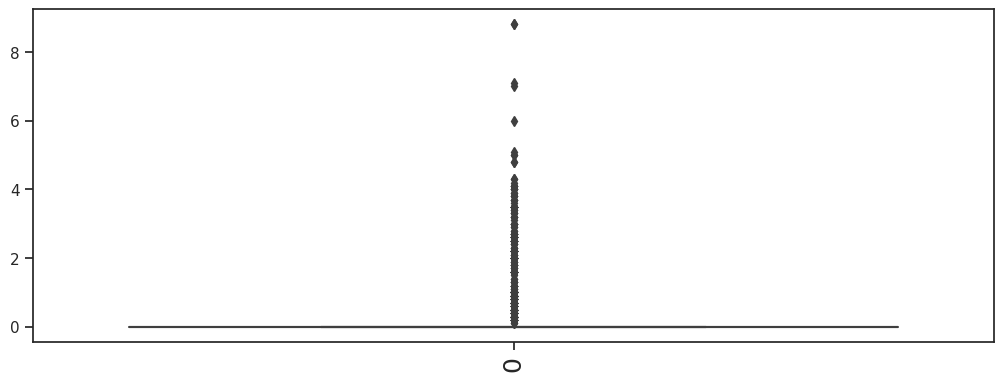

In [64]:
box_plot(value,num_feature)

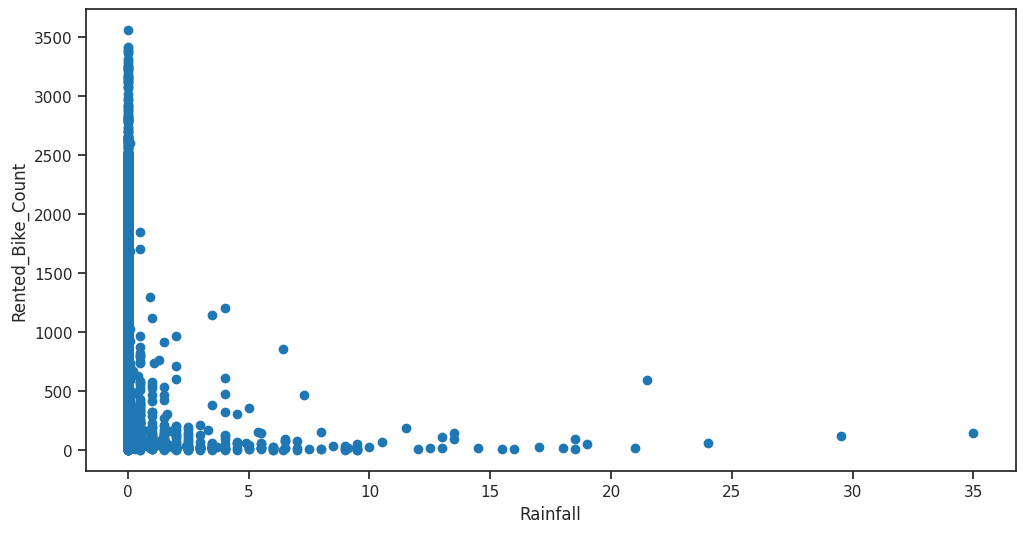

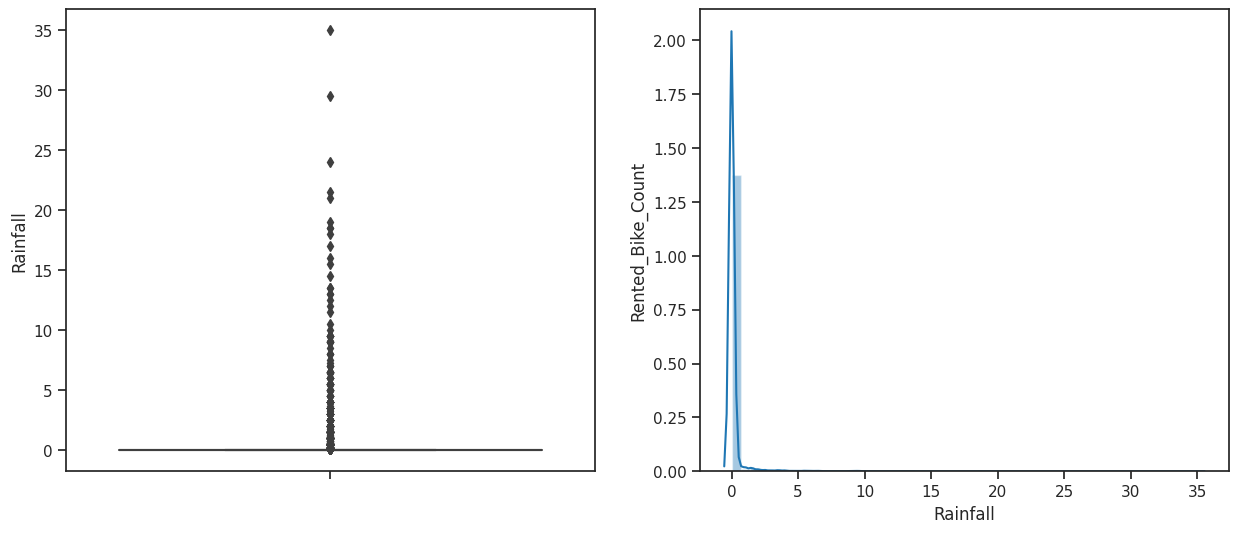

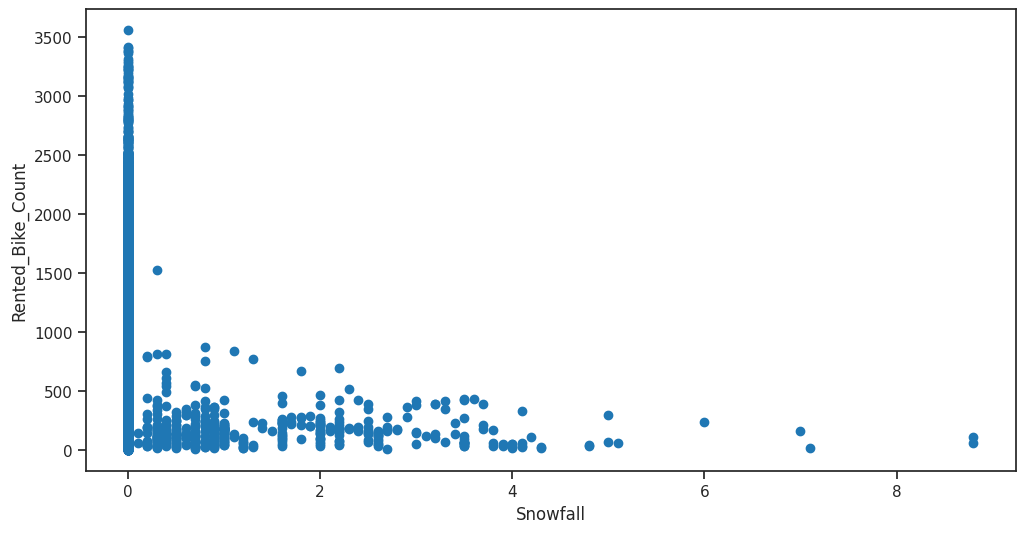

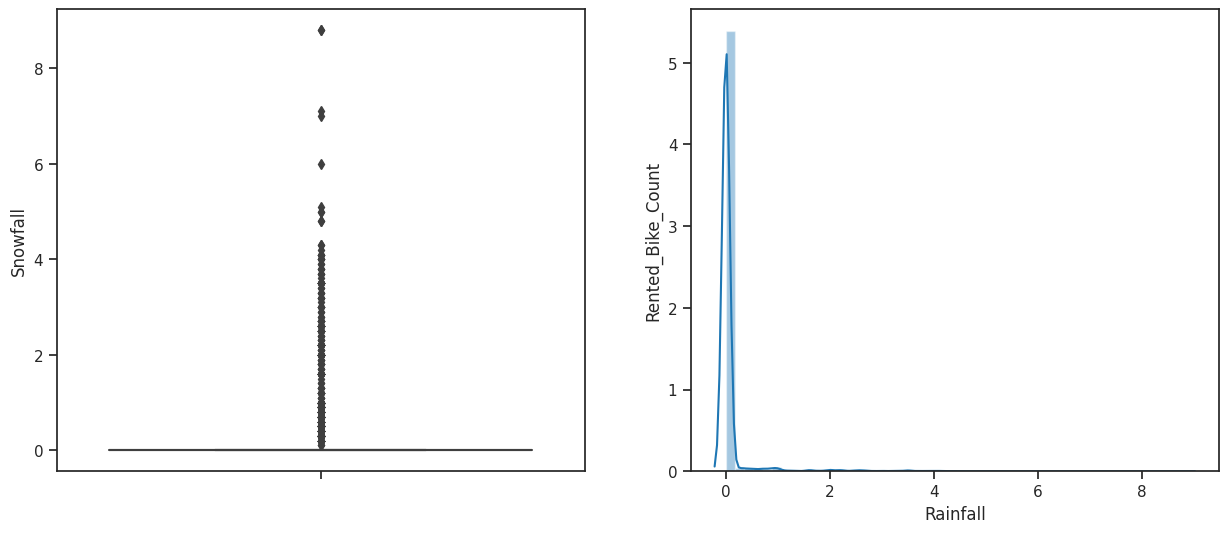

In [65]:
#detecting outliers using scatter plot for snowfall and rainfall
# Scatter plot
for i in ['Rainfall','Snowfall']:
  fig, ax = plt.subplots(figsize = (12,6))
  ax.scatter(value[i], value['Rented_Bike_Count']);

  # x-axis label
  ax.set_xlabel(i);

  # y-axis label
  ax.set_ylabel('Rented_Bike_Count');

  #distribution and box plot
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  fig = sns.boxplot(y=value[i])
  fig.set_title('')
  fig.set_ylabel(i)
      
  plt.subplot(1, 2, 2)
  fig = sns.distplot(value[i].dropna())
  fig.set_ylabel('Rented_Bike_Count')
  fig.set_xlabel("Rainfall")

  plt.show()


Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.

In [66]:
#function to cap outliers
def remove_outlier(df,feature):
  upper_lim = df[feature].quantile(.95)
  lower_lim = df[feature].quantile(.05)
  df.loc[(df[feature] > upper_lim),feature] = upper_lim
  df.loc[(df[feature] < lower_lim),feature] = lower_lim
  return df[feature]

In [67]:
#making copy for removing ouliers without affecting original
copy = value.copy()

In [68]:
copy[copy['Rainfall'] > 0]['Rainfall'].value_counts()

0.500     114
1.000      64
1.500      55
0.100      44
2.000      30
         ... 
1.900       1
17.000      1
3.700       1
1.400       1
1.800       1
Name: Rainfall, Length: 60, dtype: int64

In [69]:
copy['Rainfall']= remove_outlier(copy,'Rainfall')
copy['Snowfall']= remove_outlier(copy,'Snowfall')
copy['Rented_Bike_Count_new'] = remove_outlier(copy,'Rented_Bike_Count')

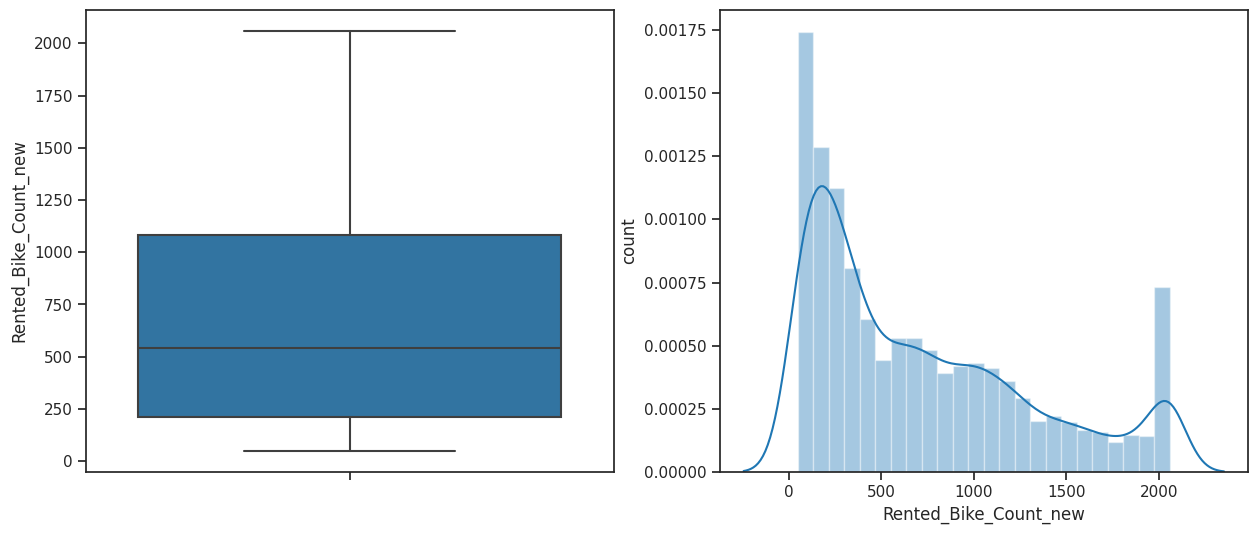

In [70]:
#testing rented bike count after removal of outliers how it worked
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=copy['Rented_Bike_Count_new'])
fig.set_title('')
fig.set_ylabel("Rented_Bike_Count_new")
    
plt.subplot(1, 2, 2)
fig = sns.distplot(copy['Rented_Bike_Count_new'].dropna())
fig.set_ylabel('count')
fig.set_xlabel("Rented_Bike_Count_new")

plt.show()

In [71]:
# copy['Snowfall']= remove_outlier(copy,'Snowfall')

In [72]:
# value['Rented_Bike_Count'] = remove_outlier(value,'Rented_Bike_Count')

In [73]:
copy[copy['Rainfall'] > 0]['Rainfall'].value_counts()

0.500    427
0.100     44
0.200     20
0.400     16
0.300      9
Name: Rainfall, dtype: int64

* Ignoring outliers in snowfall and rainfall since if treated will cause entire value to to be distributed as 0.
* Bike Rented Count which is the target valriable, shows positive skewness, therefore will try to use transformation to get better result.